In [1]:
# !pip install yfinance

In [2]:
import requests
import pprint
import pandas as pd
import yfinance as yf
import datetime
import matplotlib.pyplot as plt

#stocks = ['CVX', 'OXY', 'BP', 'XOM', 'EOG', 'TOT', 'DVN', 'RDS-B', 'EQNR', 'COP', 'CL=F']
#names = ['Chevron', 'Oxy', 'BP', 'ExxonMobil', 'EOG Resources', 'Total', 'Devon Energy', 'Shell', 'Equinor', 'ConocoPhillips', 'Oil Futures']
stocks = ['CVX', 'OXY', 'BP', 'XOM', 'RDS-B', 'CL=F', '^GSPC', 'GC=F']
names = ['Chevron', 'Oxy', 'BP', 'ExxonMobil', 'Shell', 'Oil Futures', 'S&P 500', 'Gold']

In [3]:
def data_retrieve(tickers, names, syear, smonth, sday, eyear, emonth, eday):
    start = datetime.datetime(syear, smonth, sday) # Select the start date (yyyy,m,d)
    end = datetime.datetime(eyear, emonth, eday) # Select the end date (yyyy,m,d)
    data = yf.download(tickers, start=start, end=end)
    data_fix = data.reset_index()
    data_fix.insert(0,'Name', names)
    data_fix.insert(1,'Ticker', tickers)
    return data_fix

In [4]:
master_df = data_retrieve(stocks[0], names[0], 2000, 1, 1, 2020, 12, 31)

[*********************100%***********************]  1 of 1 completed


In [5]:
#stocks = ['OXY', 'BP', 'XOM', 'EOG', 'TOT', 'DVN', 'RDS-B', 'EQNR', 'COP', 'CL=F']
#names = ['Oxy', 'BP', 'ExxonMobil', 'EOG Resources', 'Total', 'Devon Energy', 'Shell', 'Equinor', 'ConocoPhillips', 'Oil Futures']
stocks = ['OXY', 'BP', 'XOM', 'RDS-B', 'CL=F', '^GSPC','GC=F']
names = ['Oxy', 'BP', 'ExxonMobil', 'Shell', 'Oil Futures', 'S&P 500','Gold']
for stock, name in zip(stocks, names):
    add_data = data_retrieve(stock, name, 2000, 1, 1, 2020, 12, 31)
    master_df = master_df.append(add_data, ignore_index=True)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [6]:
master_df

Name Ticker       Date         Open         High          Low  \
0      Chevron    CVX 2000-01-03    42.937500    42.937500    41.281250   
1      Chevron    CVX 2000-01-04    41.468750    42.062500    41.250000   
2      Chevron    CVX 2000-01-05    41.531250    43.281250    41.531250   
3      Chevron    CVX 2000-01-06    42.656250    44.593750    42.656250   
4      Chevron    CVX 2000-01-07    45.000000    45.437500    44.500000   
...        ...    ...        ...          ...          ...          ...   
41843     Gold   GC=F 2020-12-23  1867.000000  1878.800049  1864.500000   
41844     Gold   GC=F 2020-12-28  1895.500000  1895.800049  1873.699951   
41845     Gold   GC=F 2020-12-29  1881.300049  1881.300049  1879.699951   
41846     Gold   GC=F 2020-12-30  1879.900024  1895.800049  1877.300049   
41847     Gold   GC=F 2020-12-31  1897.000000  1901.300049  1892.699951   

             Close    Adj Close   Volume  
0        41.812500    19.360474  4387600  
1        41.812500    19.360474  3702400  
2        42.562500    19.707745  5567600  
3        44.375000    20.546988  4353400  
4        45.156250    20.908724  4487400  
...            ...          ...      ...  
41843  1874.699951  1874.699951       82  
41844  1877.199951  1877.199951       75  
41845  1879.699951  1879.699951      343  
41846  1891.000000  1891.000000      444  
41847  1893.099976  1893.099976      127  

[41848 rows x 9 columns]

In [7]:
#master_df = master_df[['Ticker', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]
#master_df

In [8]:
#stocks = ['OXY', 'BP', 'XOM', 'EOG', 'TOT', 'DVN', 'RDS-B', 'EQNR', 'COP', 'CL=F']
# cvx_df = master_df[master_df['Ticker'] == 'CVX']
# oxy_df = master_df[master_df['Ticker'] == 'OXY']
# bp_df = master_df[master_df['Ticker'] == 'BP']
# xom_df = master_df[master_df['Ticker'] == 'XOM']
# shell_df = master_df[master_df['Ticker'] == 'RDS-B']
# oil_df = master_df[master_df['Ticker'] == 'CL=F']

In [9]:
def graphs(x,y,saveas):
    company_df = master_df[master_df['Ticker'] == x]
    oil_df = master_df[master_df['Ticker'] == 'CL=F']
    merge_df = pd.merge(left =oil_df, right=company_df, how='left', left_on ='Date', right_on='Date')

    ratio_open = []
    for i,j in zip(merge_df['Open_y'],merge_df['Open_x']):
        ratio_open.append(i/j) 

    ratio_close = []
    for i,j in zip(merge_df['Open_y'],merge_df['Open_x']):
        ratio_close.append(i/j) 
    
    fig, axs = plt.subplots(4, figsize=(20,15))
    fig.suptitle(f'Trendlines of {y}', fontsize = 24)
    axs[0].plot(merge_df['Date'], merge_df['Volume_y'])
    axs[0].grid()
    axs[0].set_ylabel('Volume', fontsize = 18)
    axs[0].tick_params(axis='y', labelsize=14) 
    axs[0].tick_params(axis='x', labelsize=14) 
    axs[1].plot(merge_df['Date'], merge_df['Close_y'])
    axs[1].grid()
    axs[1].set_ylabel('Close Price', fontsize = 18)
    axs[1].tick_params(axis='y', labelsize=14) 
    axs[1].tick_params(axis='x', labelsize=14)
    axs[2].plot(merge_df['Date'], merge_df['Close_x'])
    axs[2].grid()
    axs[2].set_ylabel('Oil Price', fontsize = 18)
    axs[2].tick_params(axis='y', labelsize=14) 
    axs[2].tick_params(axis='x', labelsize=14)
    axs[3].plot(merge_df['Date'], ratio_close)
    axs[3].grid()
    axs[3].set_ylabel('Ratio with Oil', fontsize = 18)
    axs[3].tick_params(axis='y', labelsize=14) 
    axs[3].tick_params(axis='x', labelsize=14)
    axs[3].set_ylim(bottom = 0)
    plt.savefig(saveas)
    plt.show()

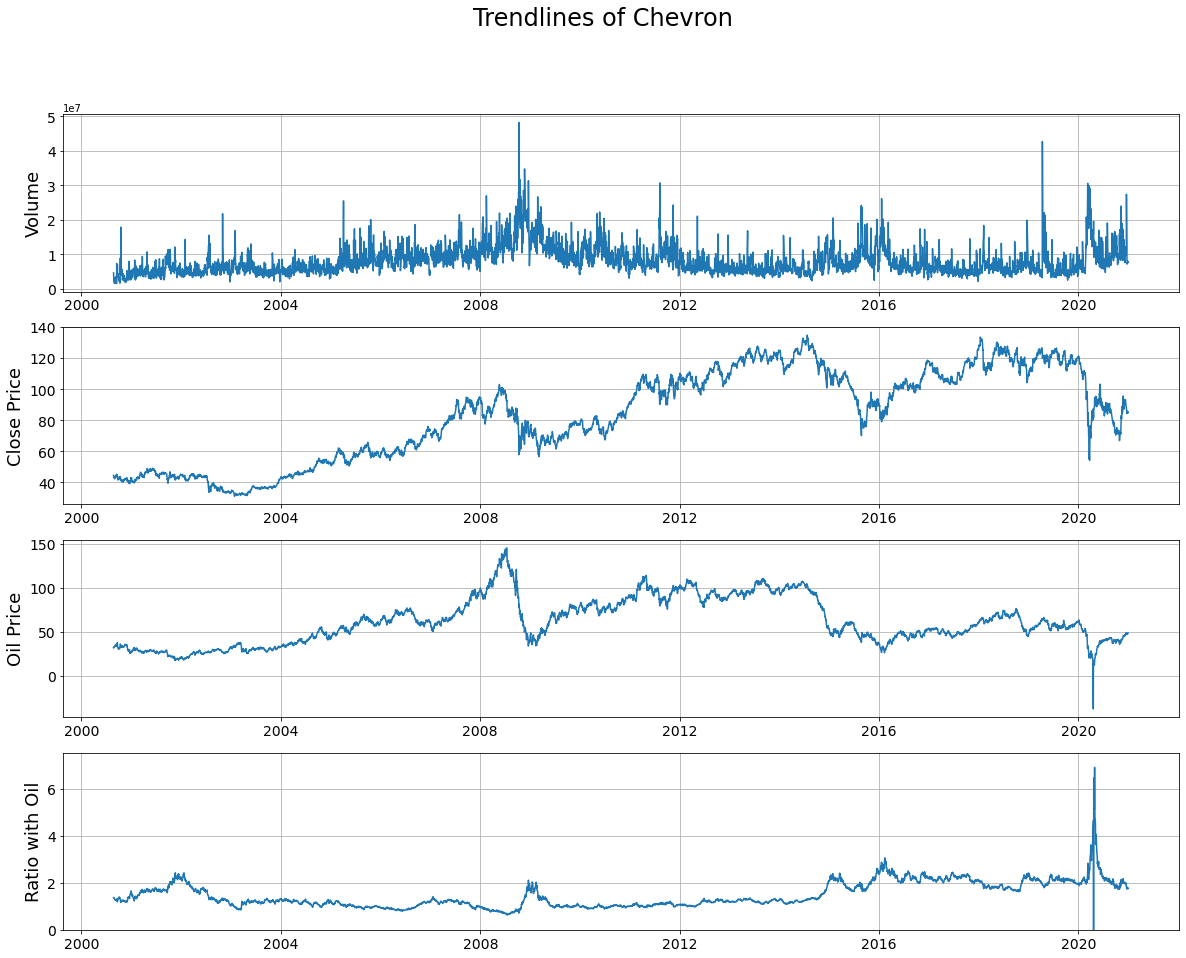

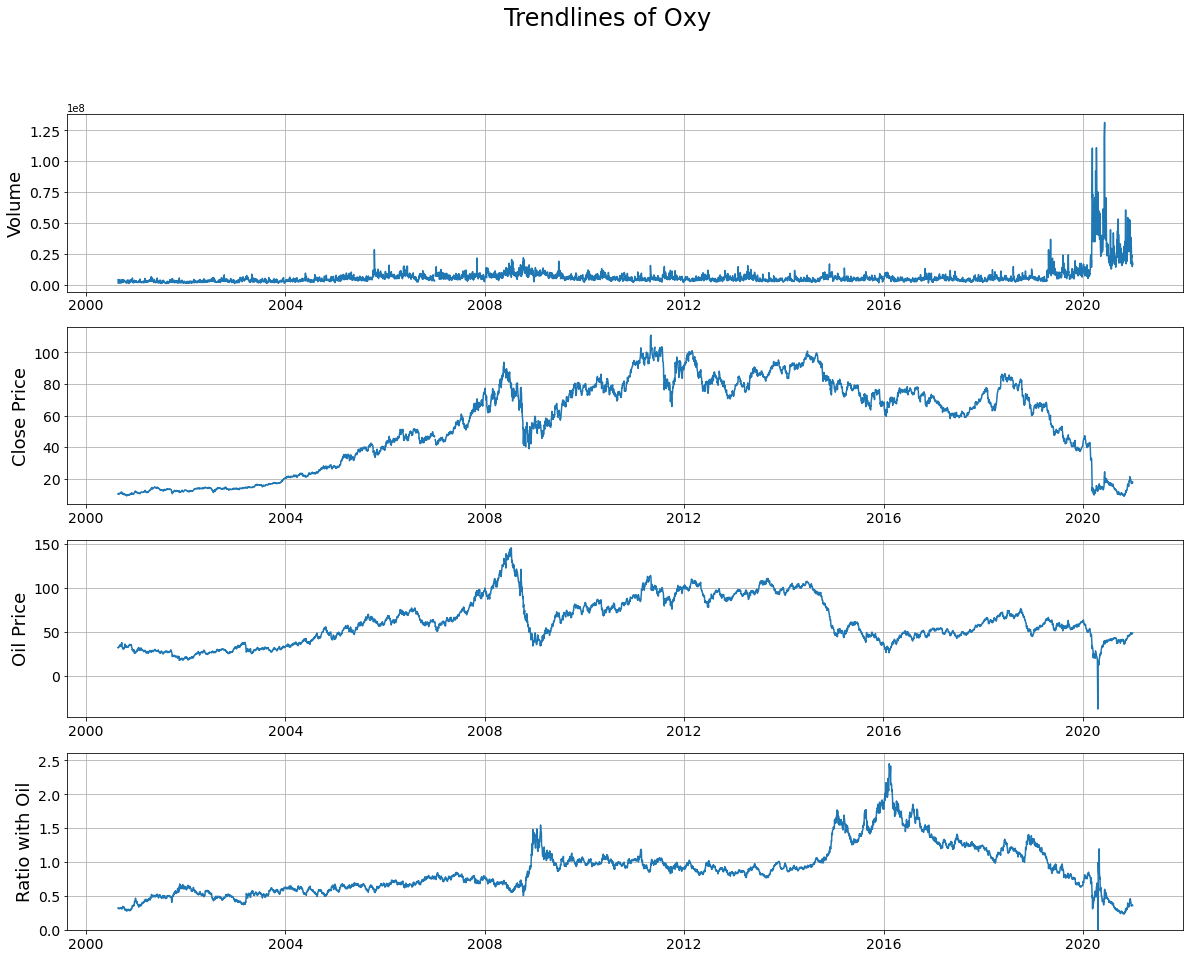

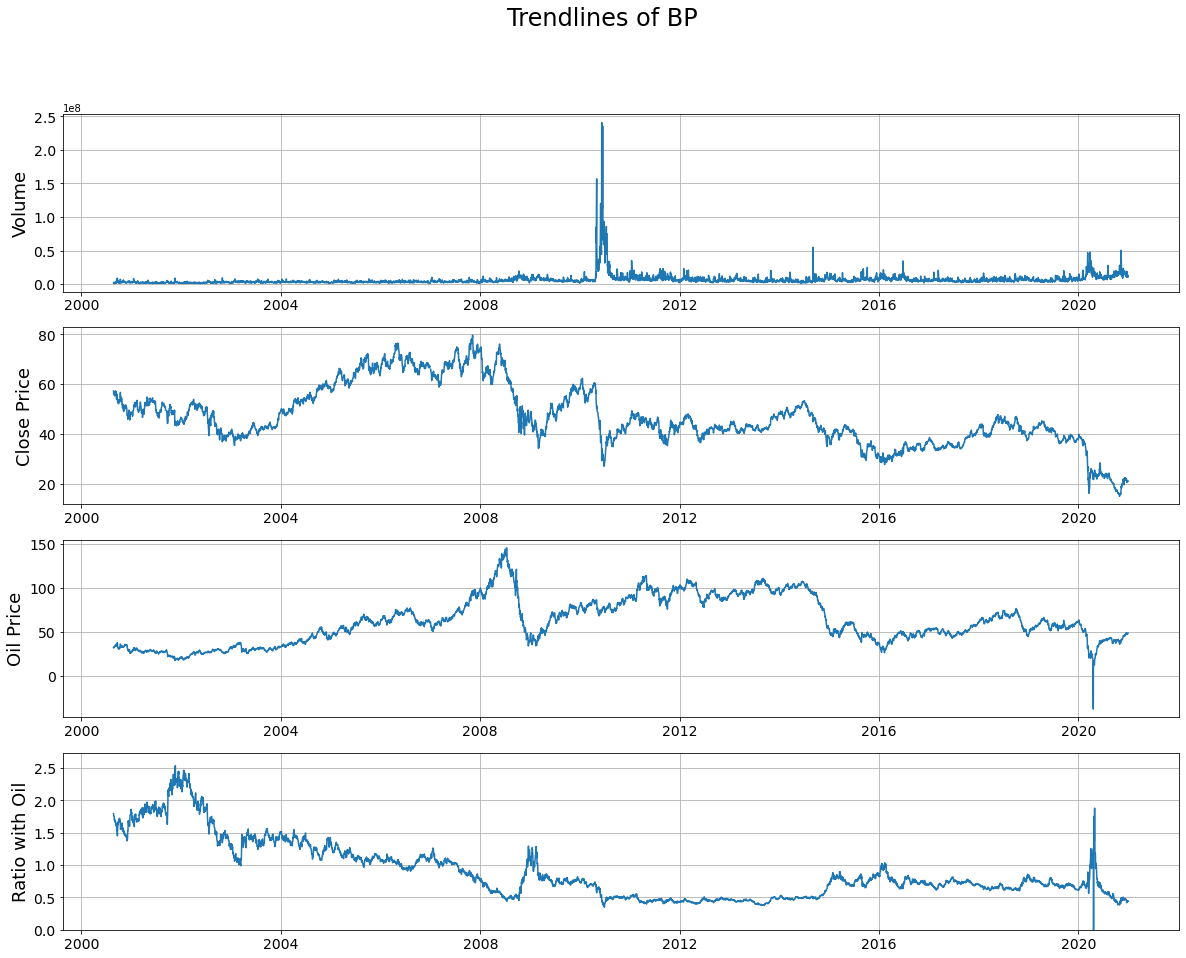

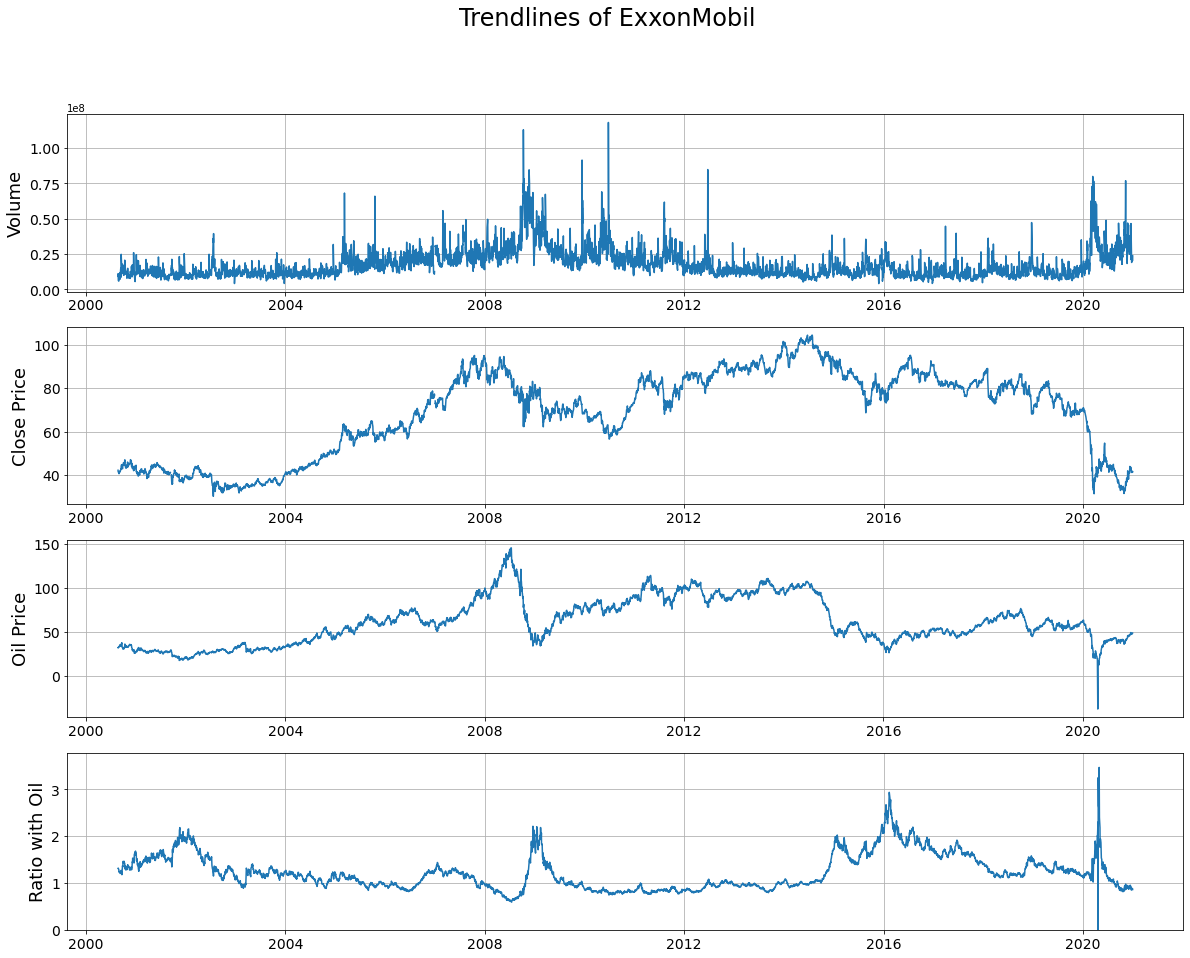

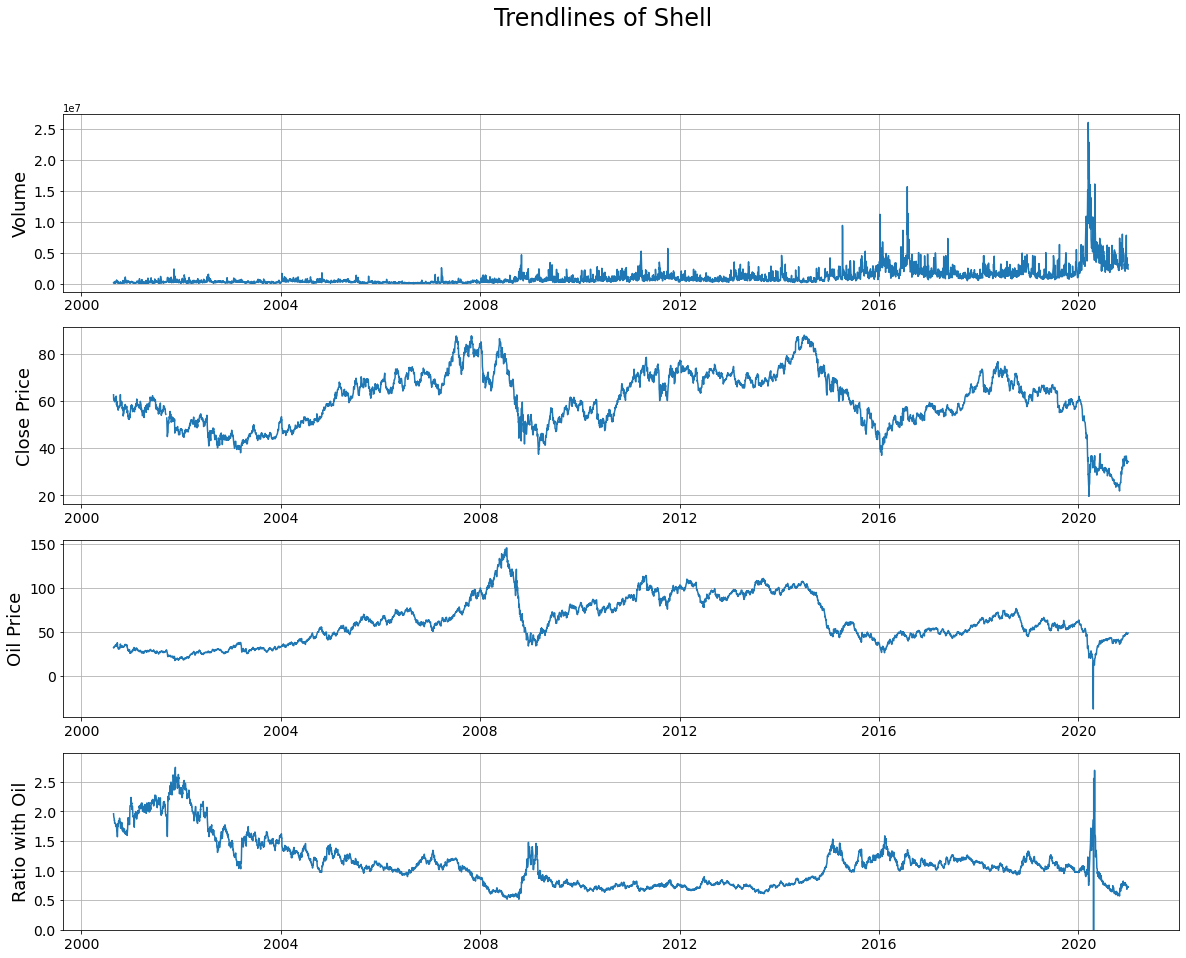

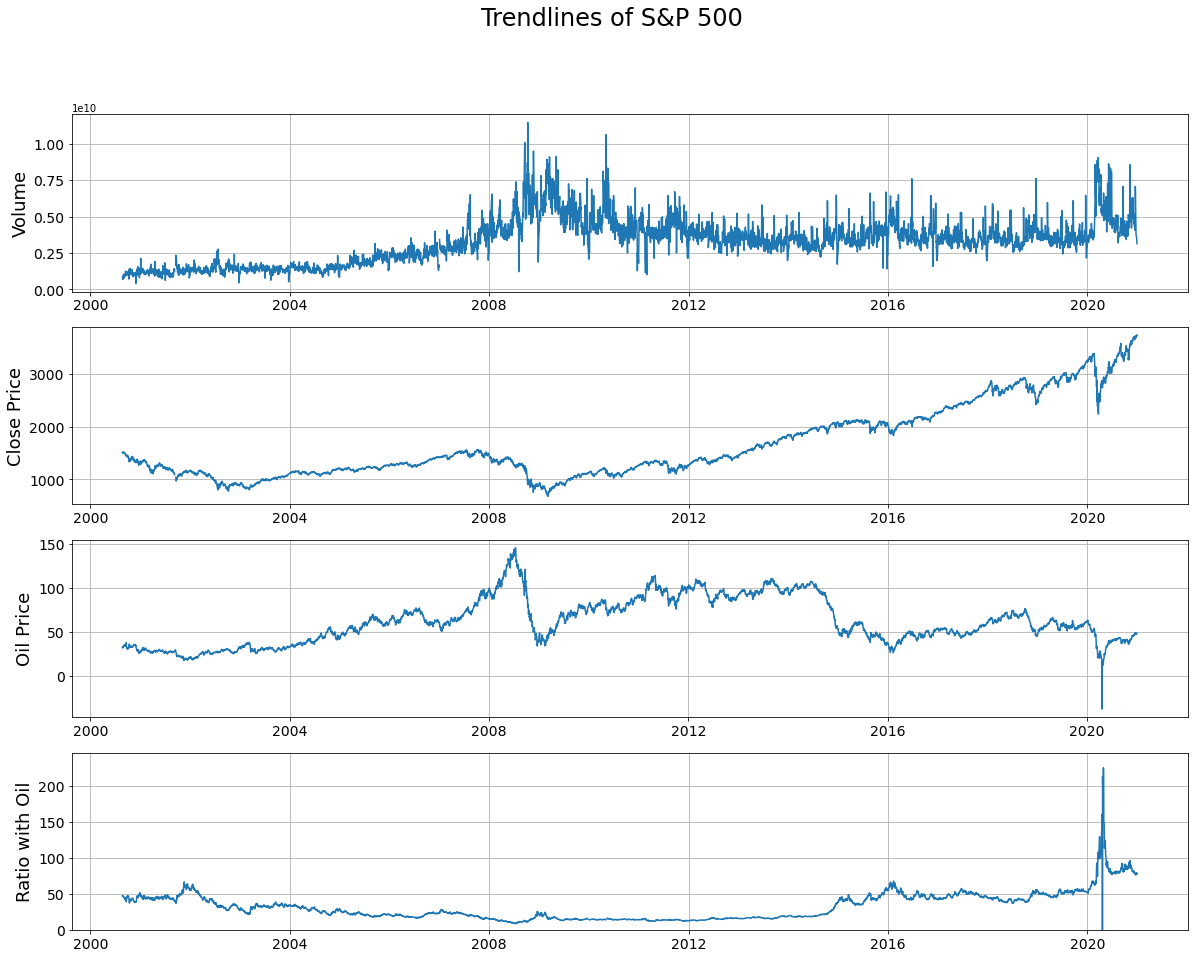

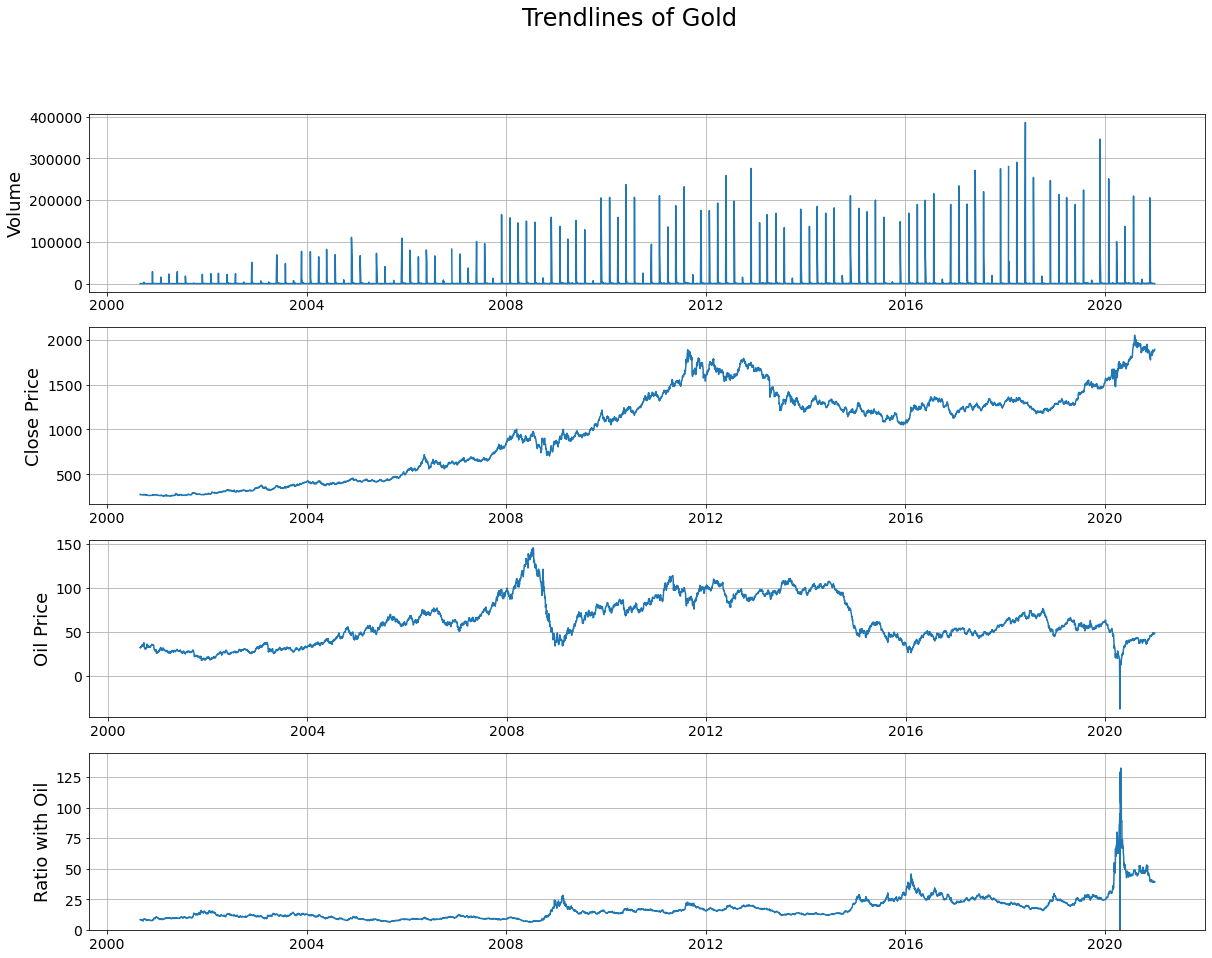

In [10]:
stocks = ['CVX', 'OXY', 'BP', 'XOM', 'RDS-B', '^GSPC', 'GC=F']
names = ['Chevron', 'Oxy', 'BP', 'ExxonMobil', 'Shell', 'S&P 500', 'Gold']
for (x,y) in zip(stocks,names):
    graphs(x,y,f'outputs/{y}.png')


In [11]:
master_df = data_retrieve(stocks[0], names[0], 2008, 1, 1, 2009, 12, 31)

[*********************100%***********************]  1 of 1 completed


In [12]:
#stocks = ['OXY', 'BP', 'XOM', 'EOG', 'TOT', 'DVN', 'RDS-B', 'EQNR', 'COP', 'CL=F']
#names = ['Oxy', 'BP', 'ExxonMobil', 'EOG Resources', 'Total', 'Devon Energy', 'Shell', 'Equinor', 'ConocoPhillips', 'Oil Futures']
stocks = ['OXY', 'BP', 'XOM', 'RDS-B', 'CL=F', '^GSPC','GC=F']
names = ['Oxy', 'BP', 'ExxonMobil', 'Shell', 'Oil Futures', 'S&P 500','Gold']
for stock, name in zip(stocks, names):
    add_data = data_retrieve(stock, name, 2008, 1, 1, 2009, 12, 31)
    master_df = master_df.append(add_data, ignore_index=True)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


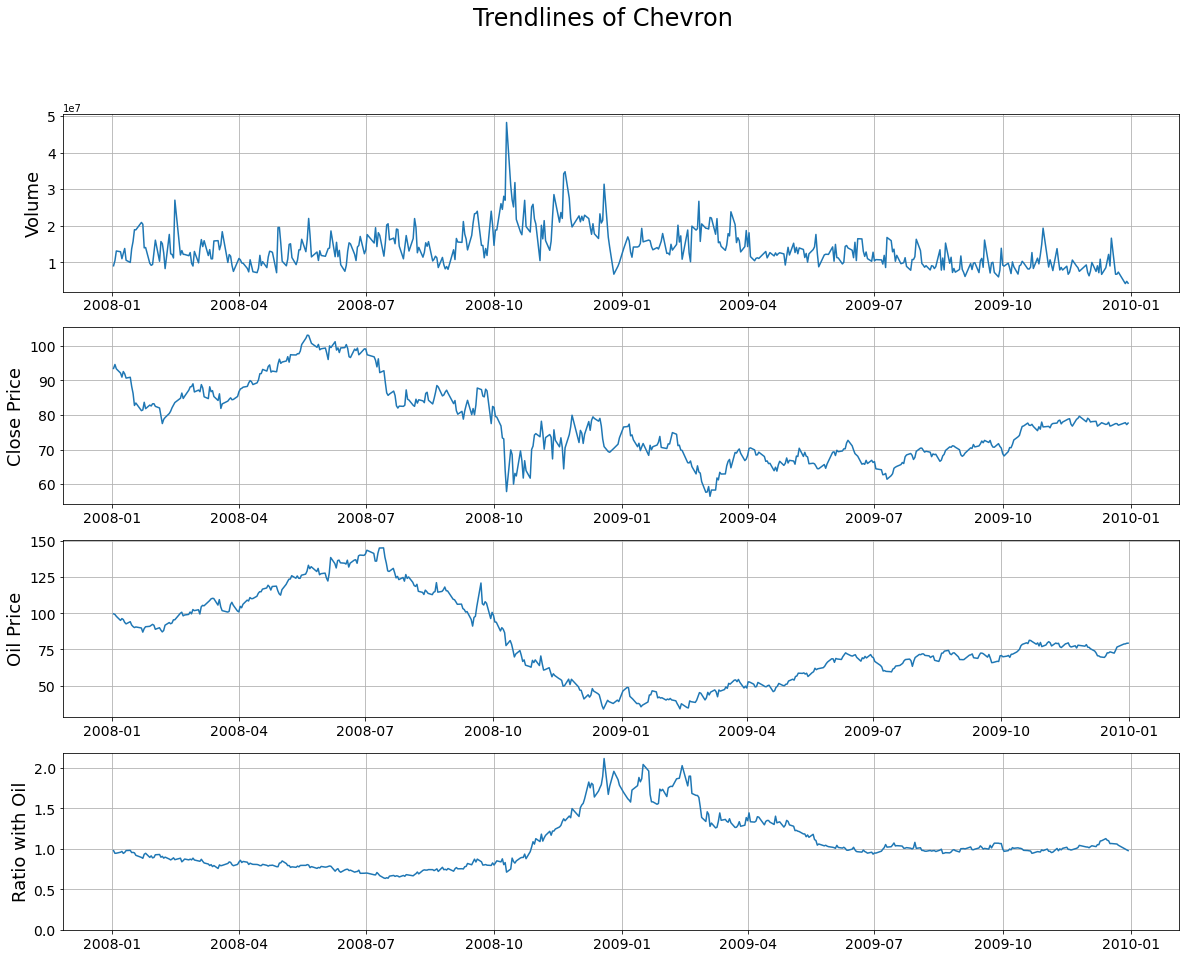

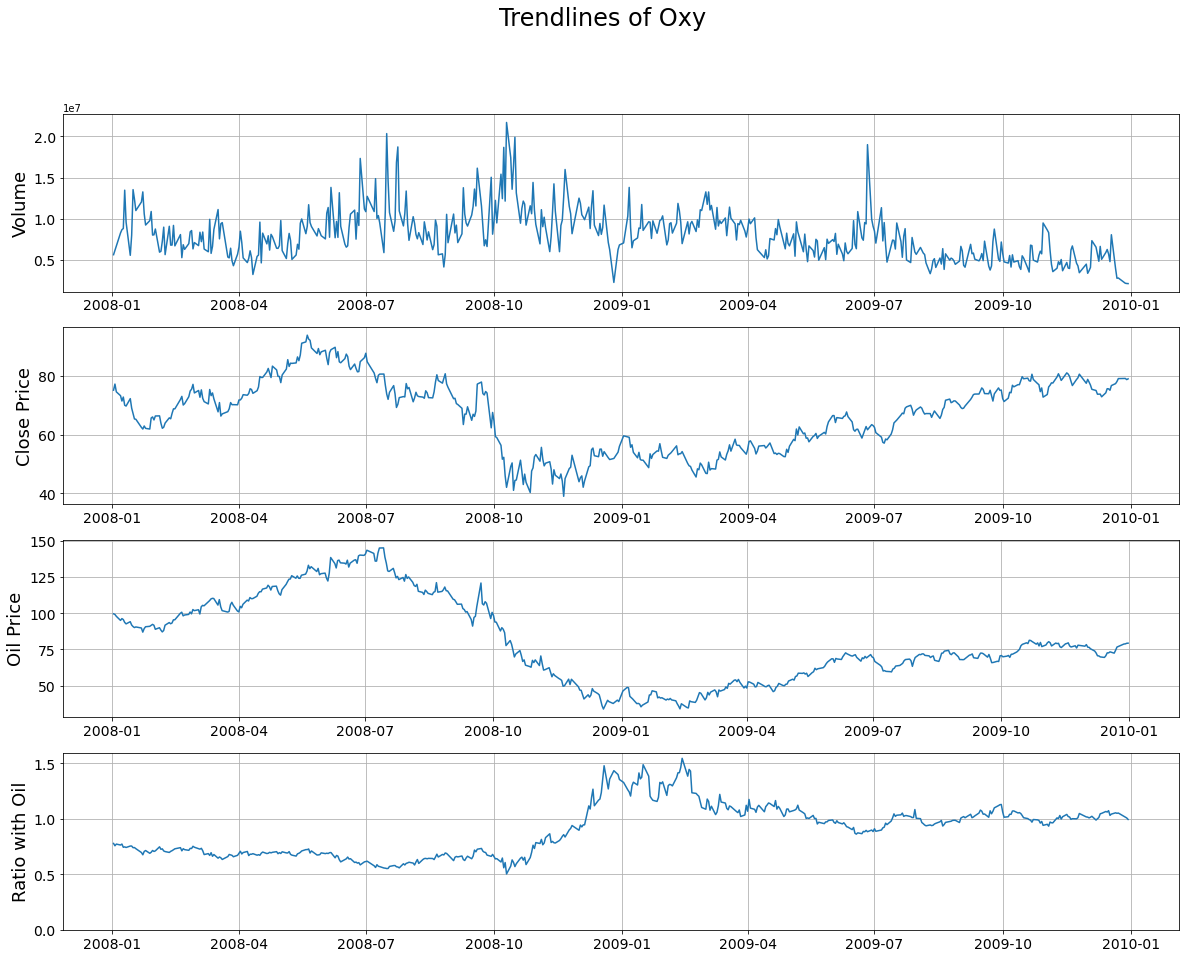

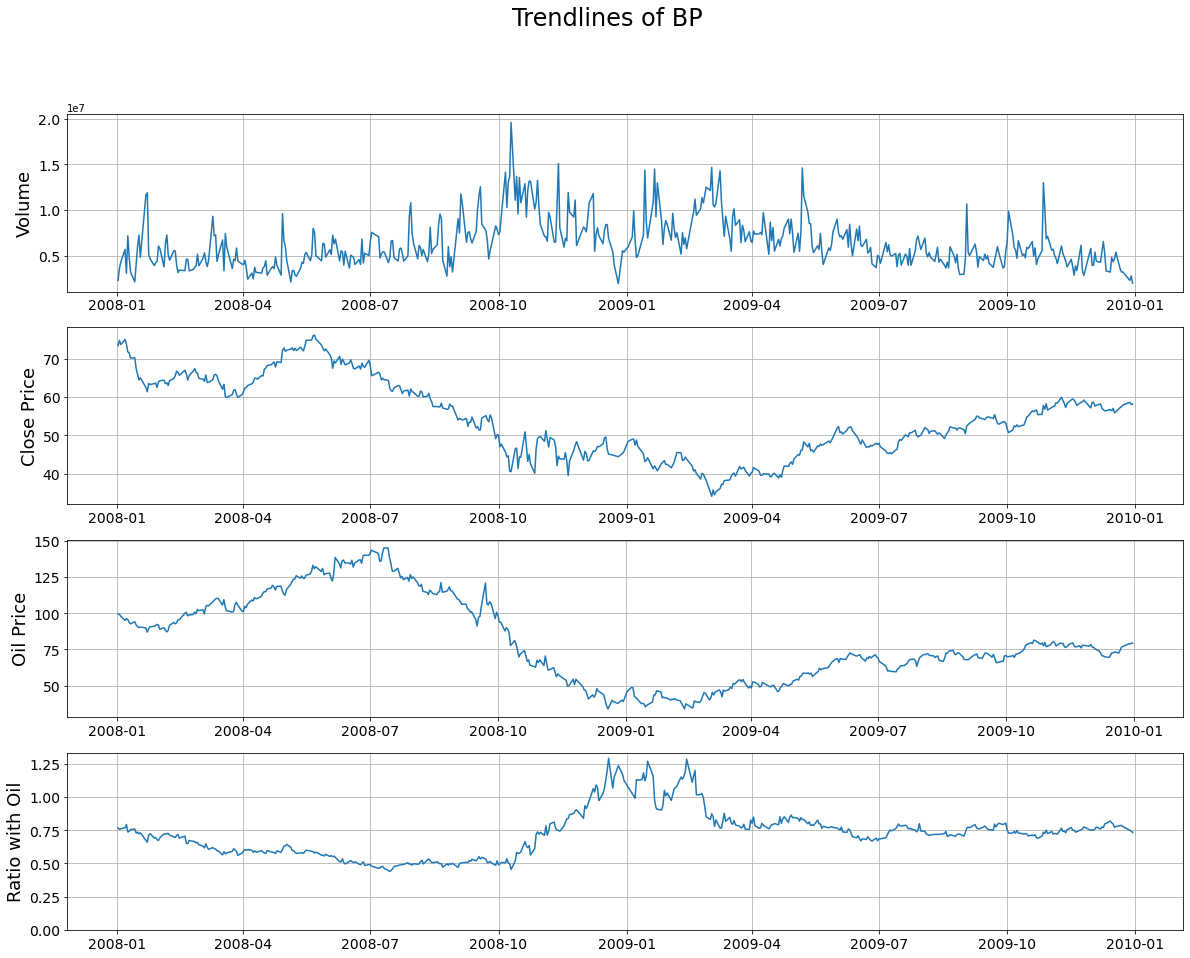

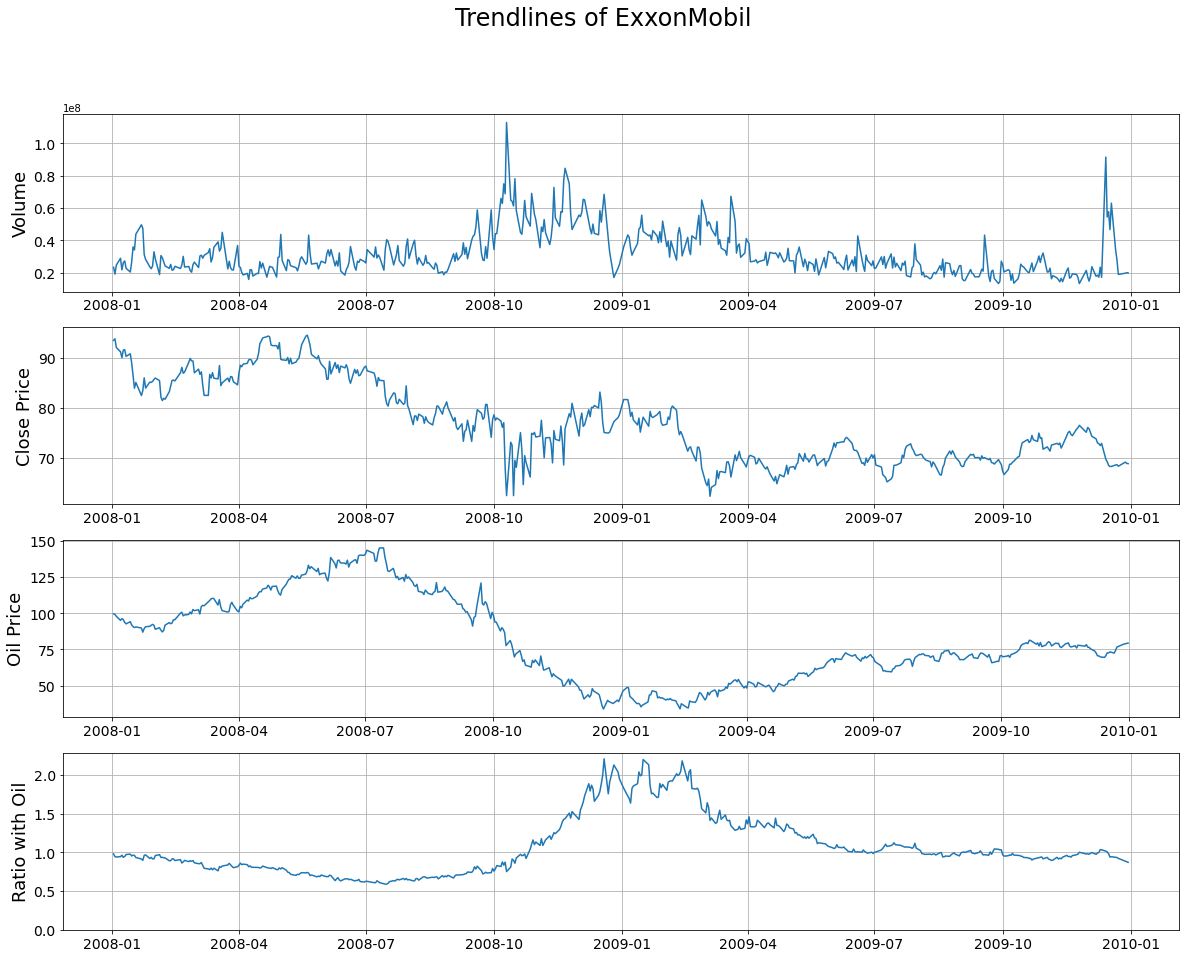

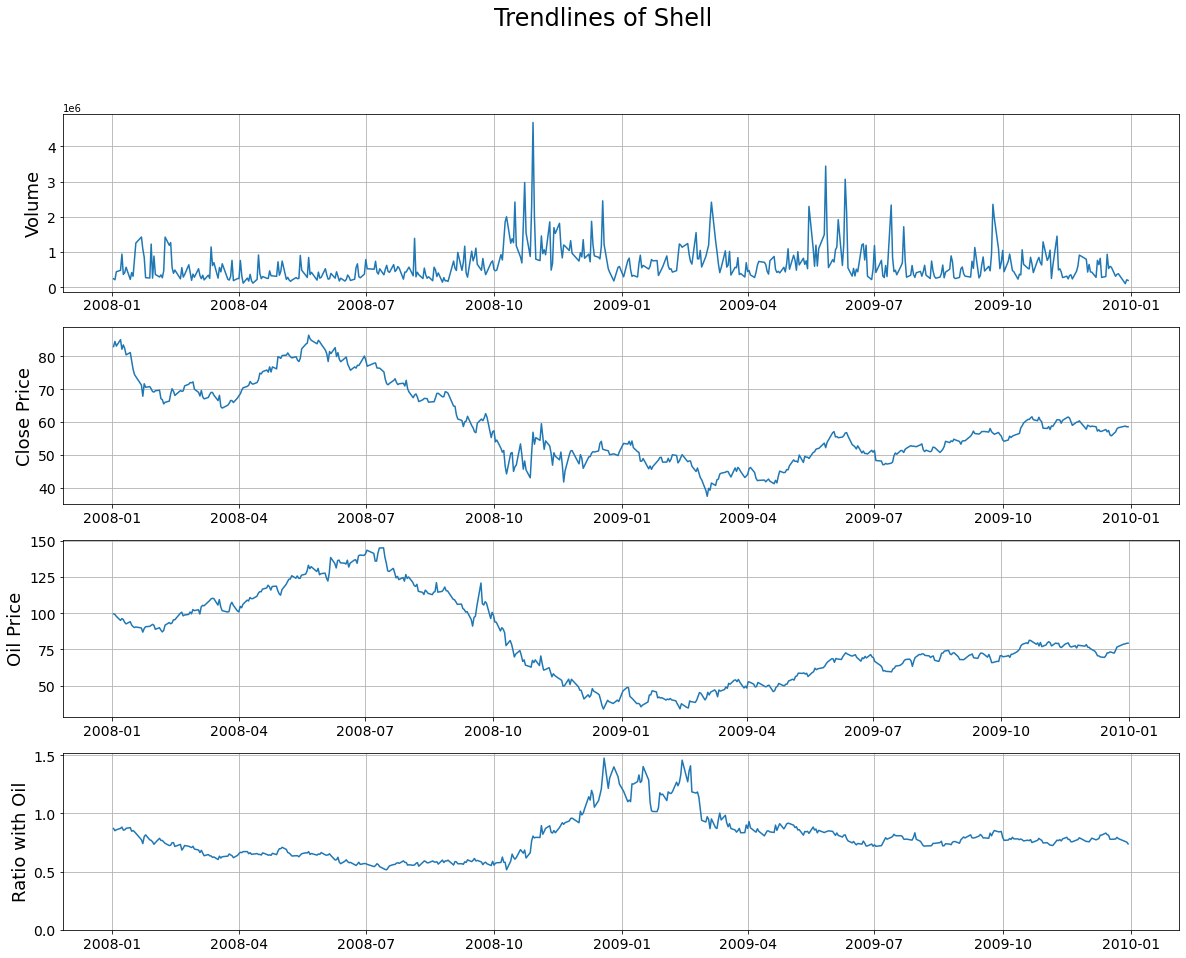

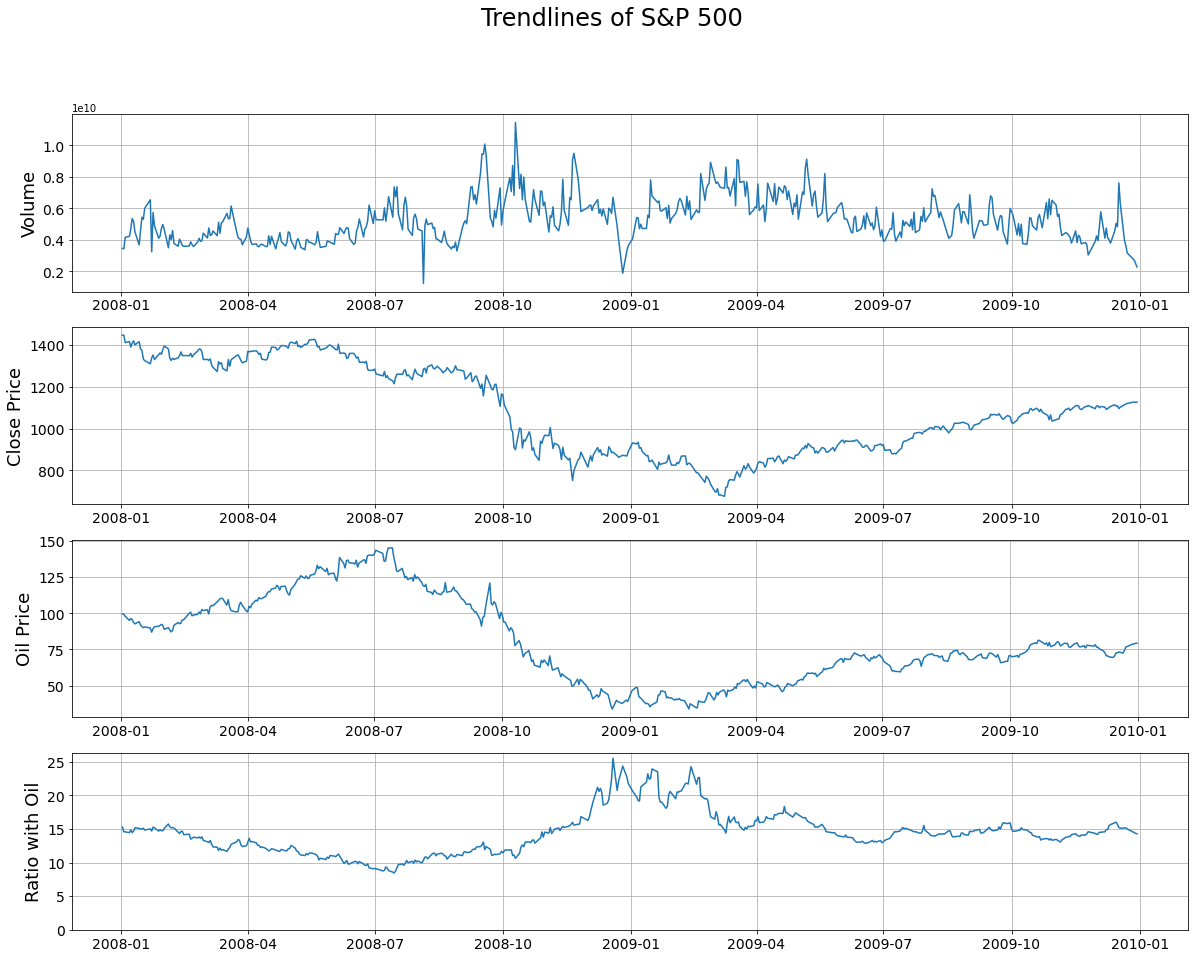

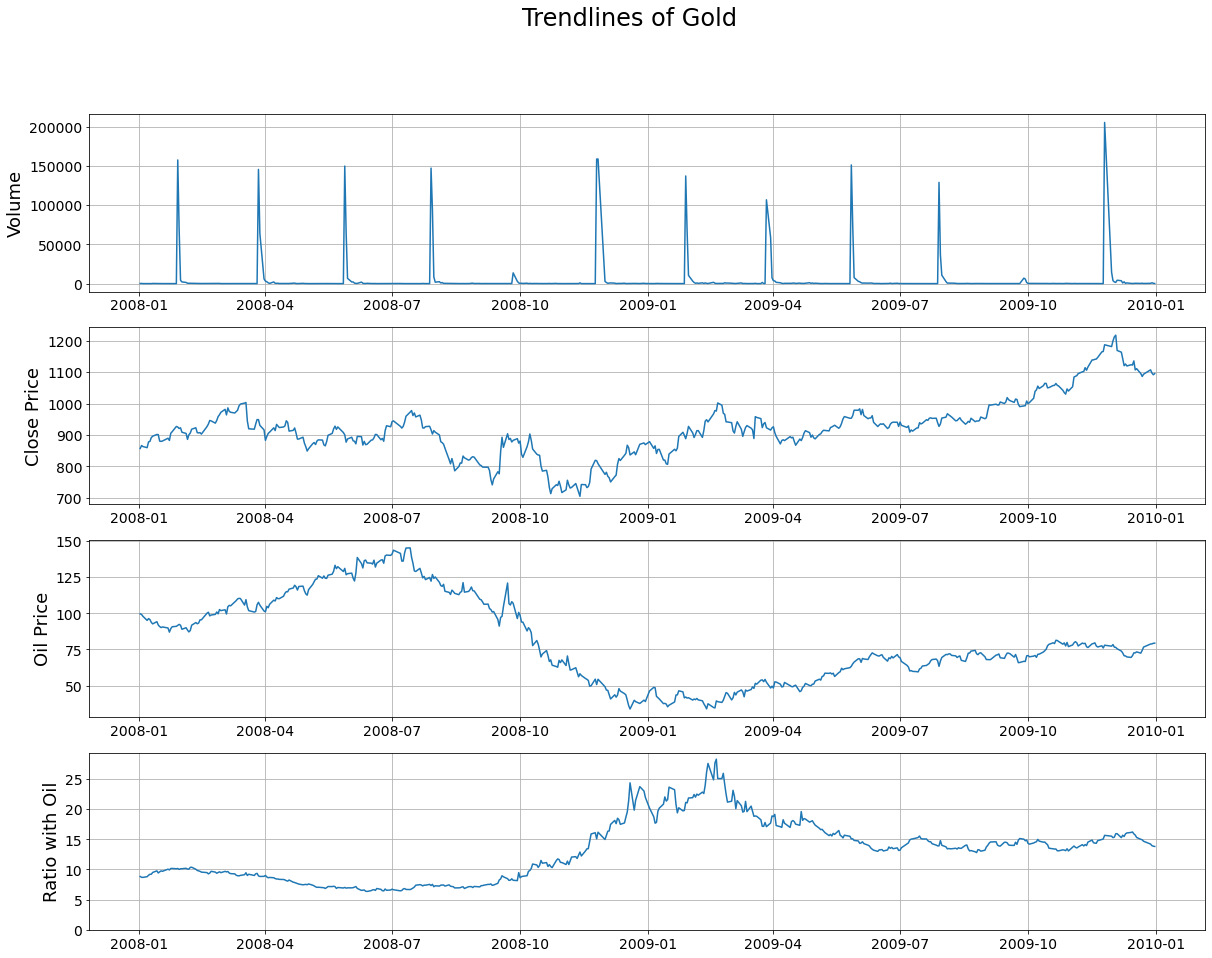

In [13]:
stocks = ['CVX', 'OXY', 'BP', 'XOM', 'RDS-B', '^GSPC', 'GC=F']
names = ['Chevron', 'Oxy', 'BP', 'ExxonMobil', 'Shell', 'S&P 500', 'Gold']
for (x,y) in zip(stocks,names):
    graphs(x,y,f'outputs/{y}_08-09.png')

In [14]:
master_df = data_retrieve(stocks[0], names[0], 2014, 1, 1, 2016, 12, 31)

[*********************100%***********************]  1 of 1 completed


In [15]:
#stocks = ['OXY', 'BP', 'XOM', 'EOG', 'TOT', 'DVN', 'RDS-B', 'EQNR', 'COP', 'CL=F']
#names = ['Oxy', 'BP', 'ExxonMobil', 'EOG Resources', 'Total', 'Devon Energy', 'Shell', 'Equinor', 'ConocoPhillips', 'Oil Futures']
stocks = ['OXY', 'BP', 'XOM', 'RDS-B', 'CL=F', '^GSPC','GC=F']
names = ['Oxy', 'BP', 'ExxonMobil', 'Shell', 'Oil Futures', 'S&P 500','Gold']
for stock, name in zip(stocks, names):
    add_data = data_retrieve(stock, name, 2014, 1, 1, 2016, 12, 31)
    master_df = master_df.append(add_data, ignore_index=True)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


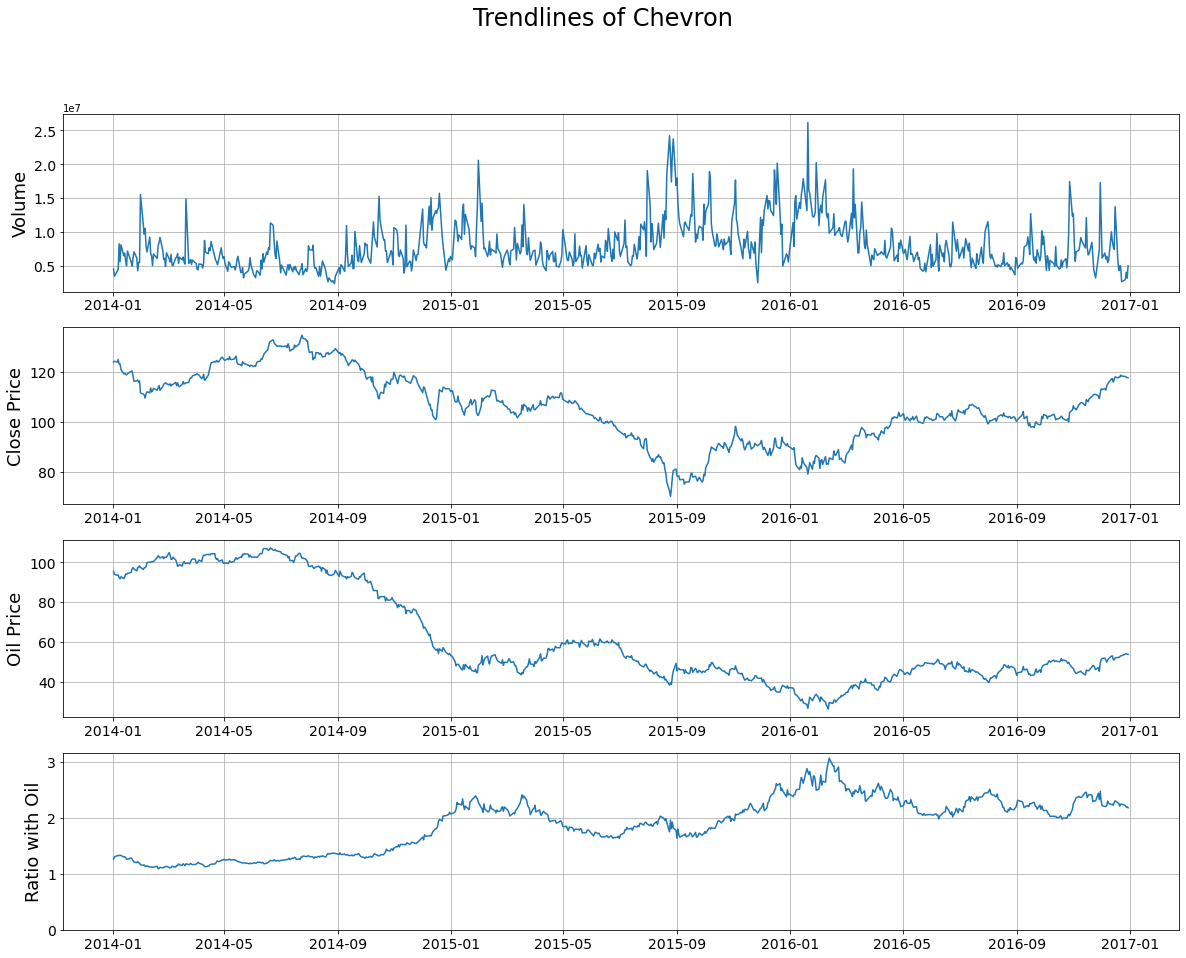

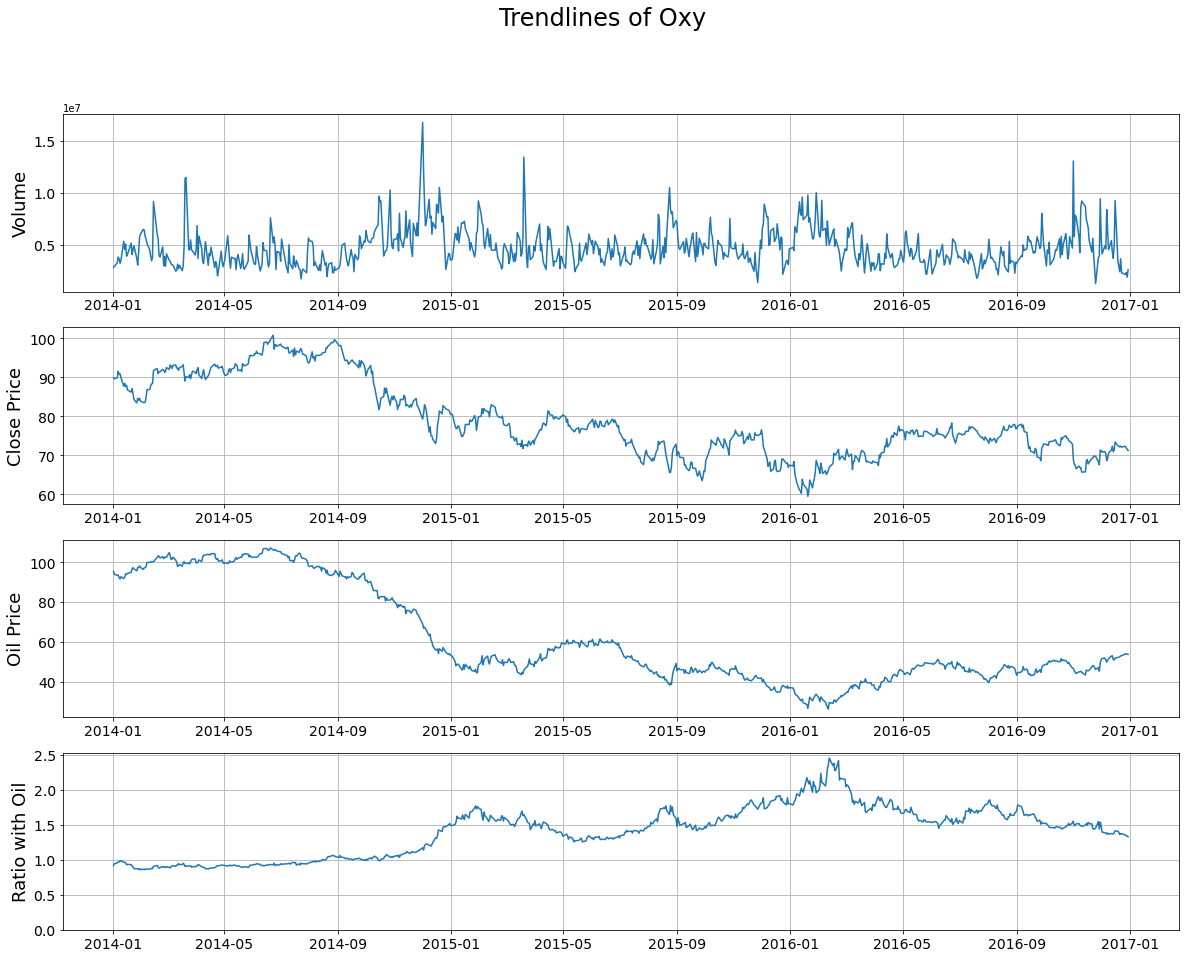

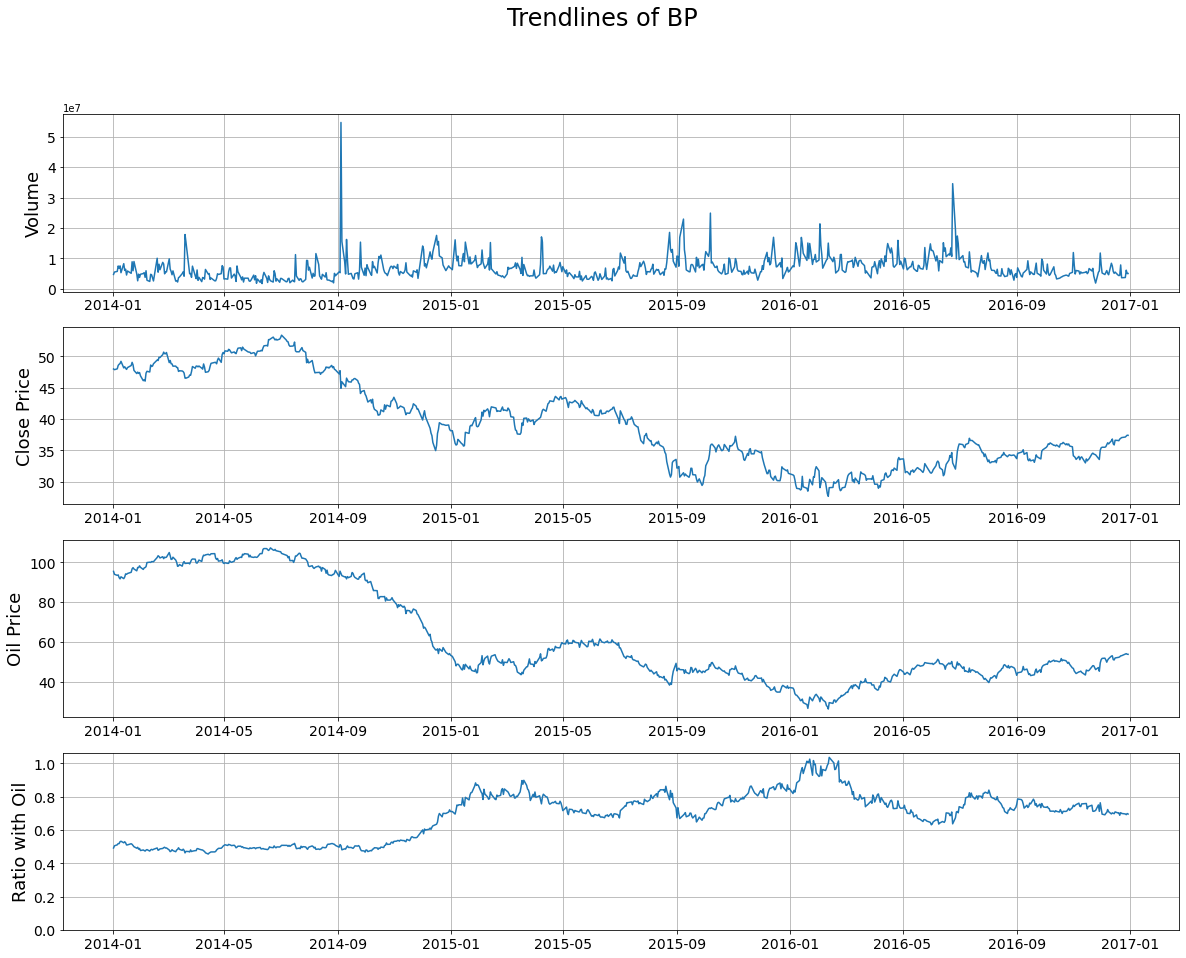

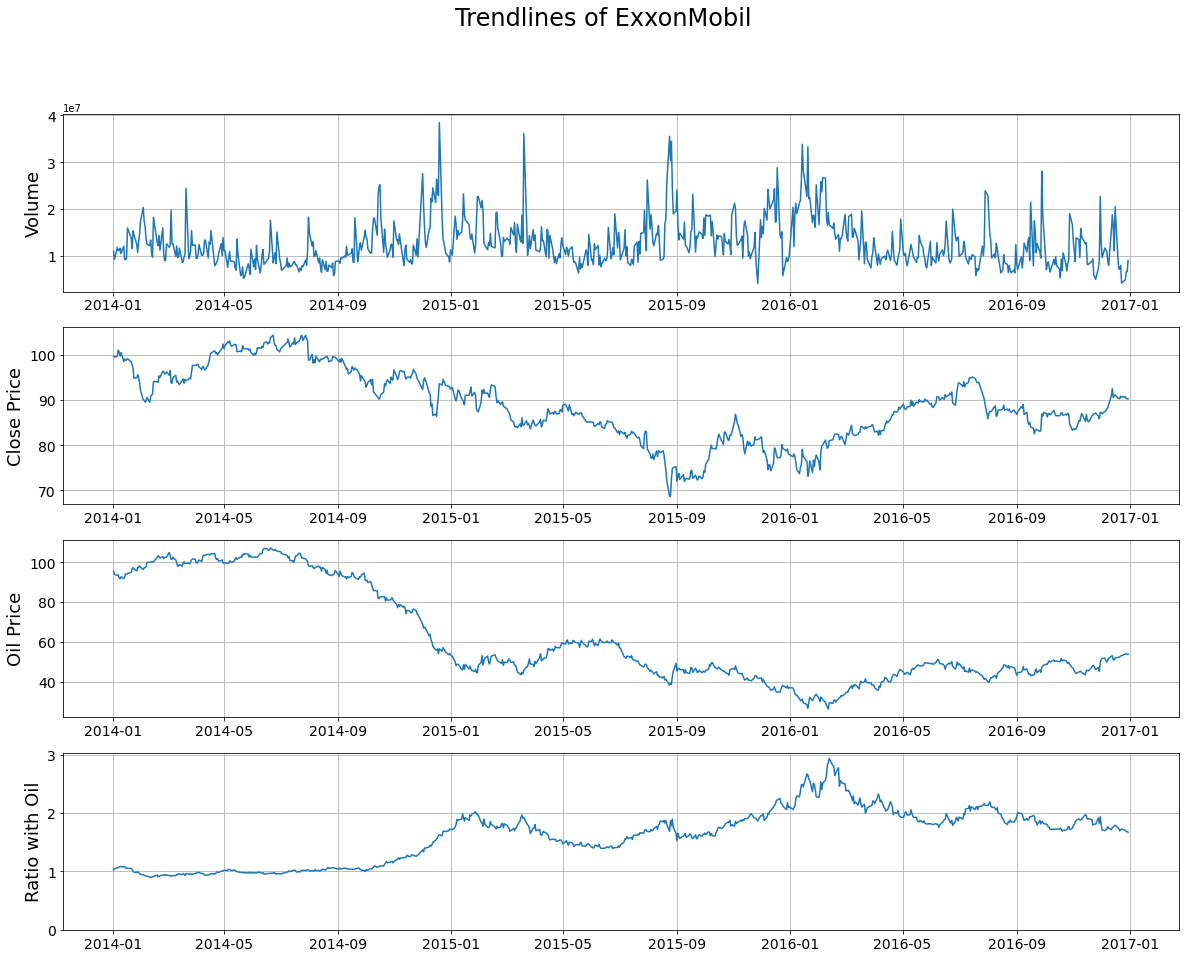

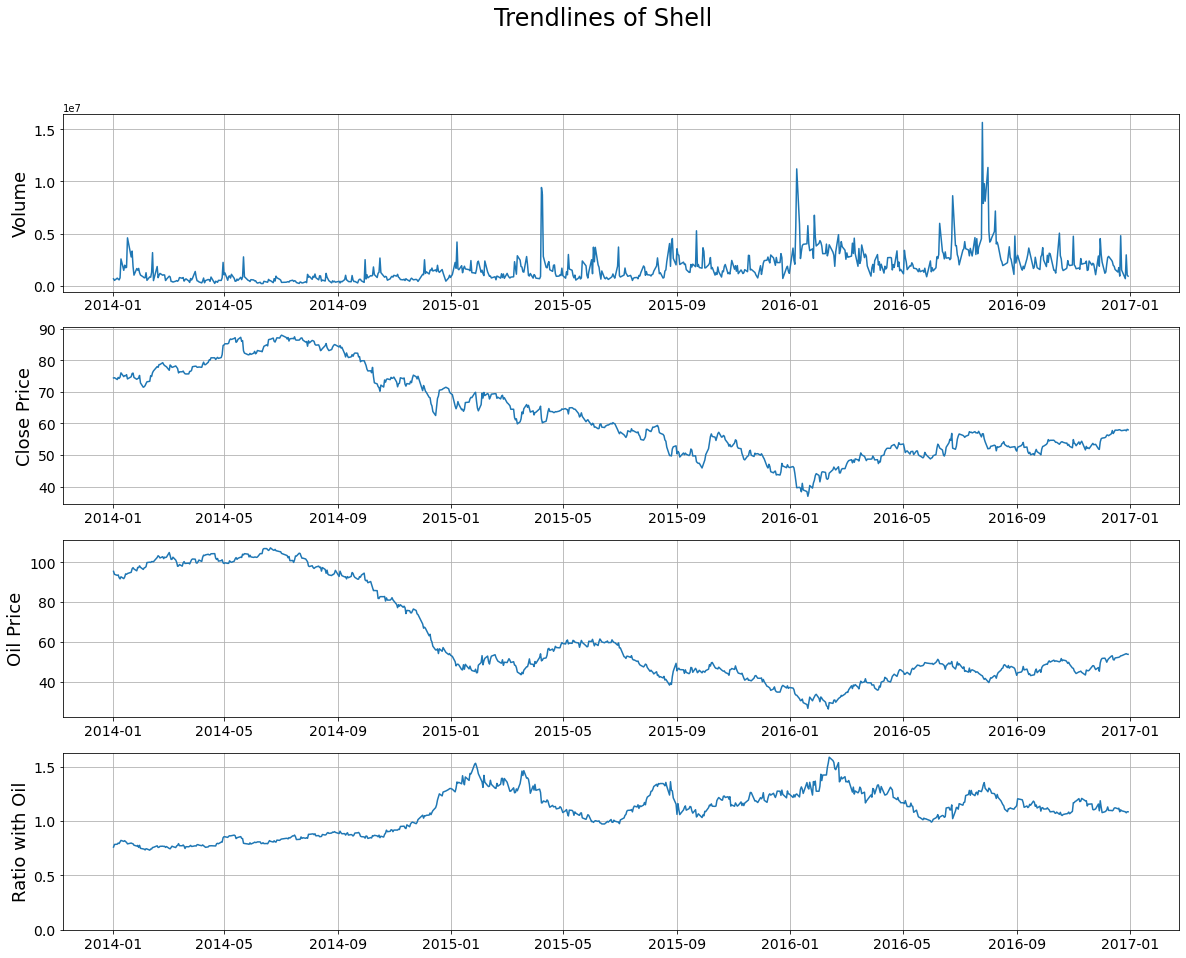

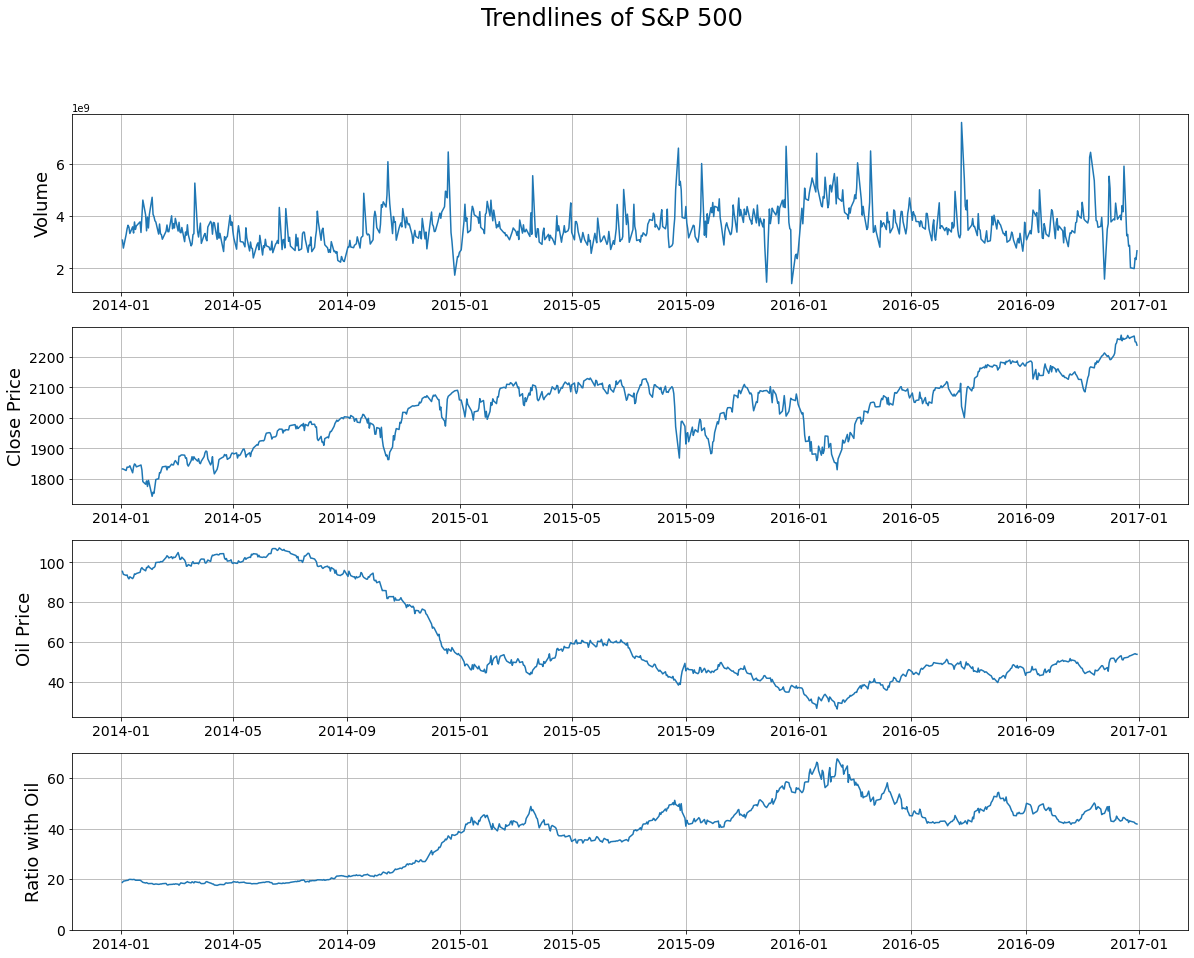

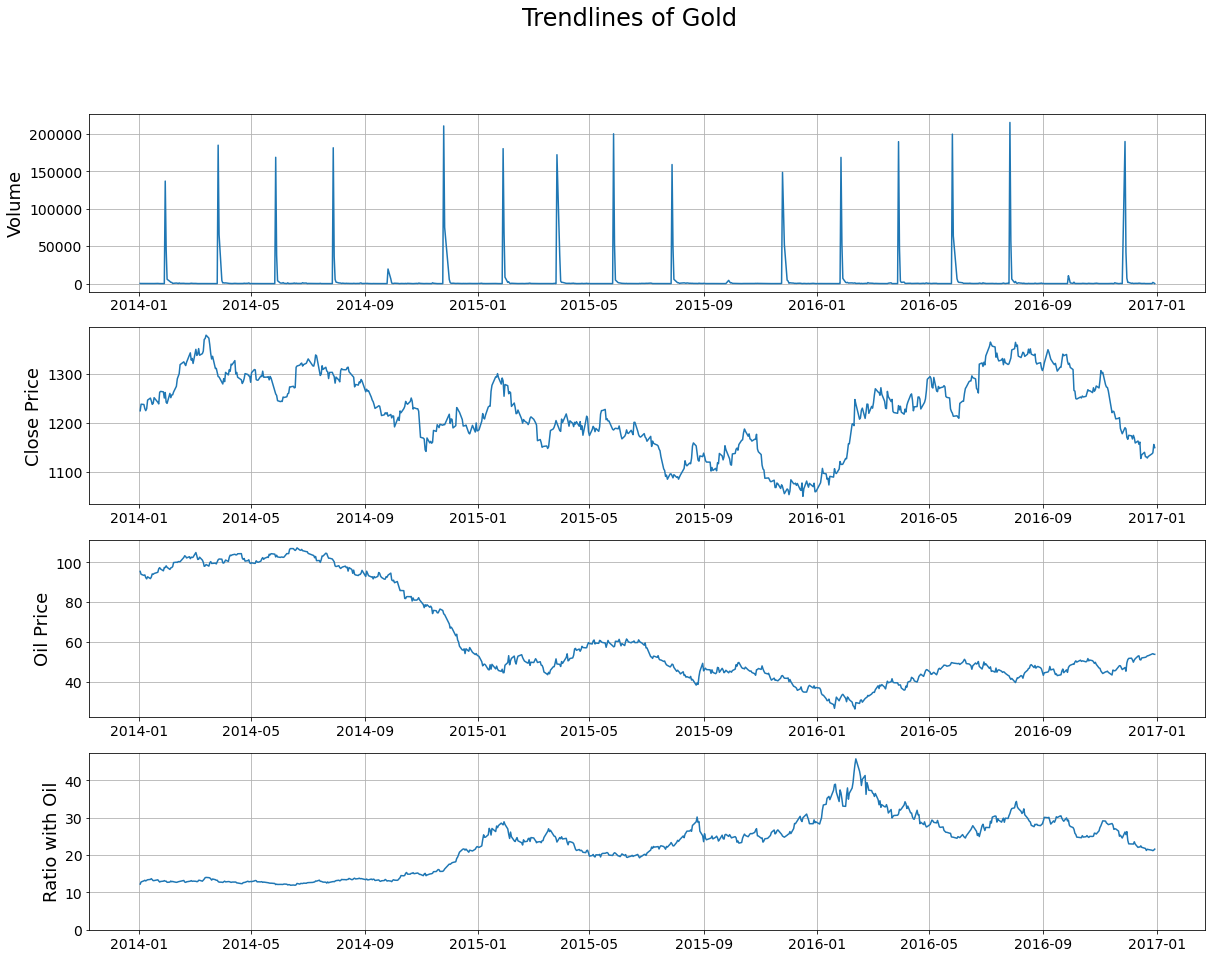

In [16]:
stocks = ['CVX', 'OXY', 'BP', 'XOM', 'RDS-B', '^GSPC', 'GC=F']
names = ['Chevron', 'Oxy', 'BP', 'ExxonMobil', 'Shell', 'S&P 500', 'Gold']
for (x,y) in zip(stocks,names):
    graphs(x,y,f'outputs/{y}_14-16.png')

In [17]:
master_df = data_retrieve(stocks[0], names[0], 2020, 1, 1, 2021, 3, 10)

[*********************100%***********************]  1 of 1 completed


In [18]:
#stocks = ['OXY', 'BP', 'XOM', 'EOG', 'TOT', 'DVN', 'RDS-B', 'EQNR', 'COP', 'CL=F']
#names = ['Oxy', 'BP', 'ExxonMobil', 'EOG Resources', 'Total', 'Devon Energy', 'Shell', 'Equinor', 'ConocoPhillips', 'Oil Futures']
stocks = ['OXY', 'BP', 'XOM', 'RDS-B', 'CL=F', '^GSPC','GC=F']
names = ['Oxy', 'BP', 'ExxonMobil', 'Shell', 'Oil Futures', 'S&P 500','Gold']
for stock, name in zip(stocks, names):
    add_data = data_retrieve(stock, name, 2020, 1, 1, 2021, 3, 10)
    master_df = master_df.append(add_data, ignore_index=True)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


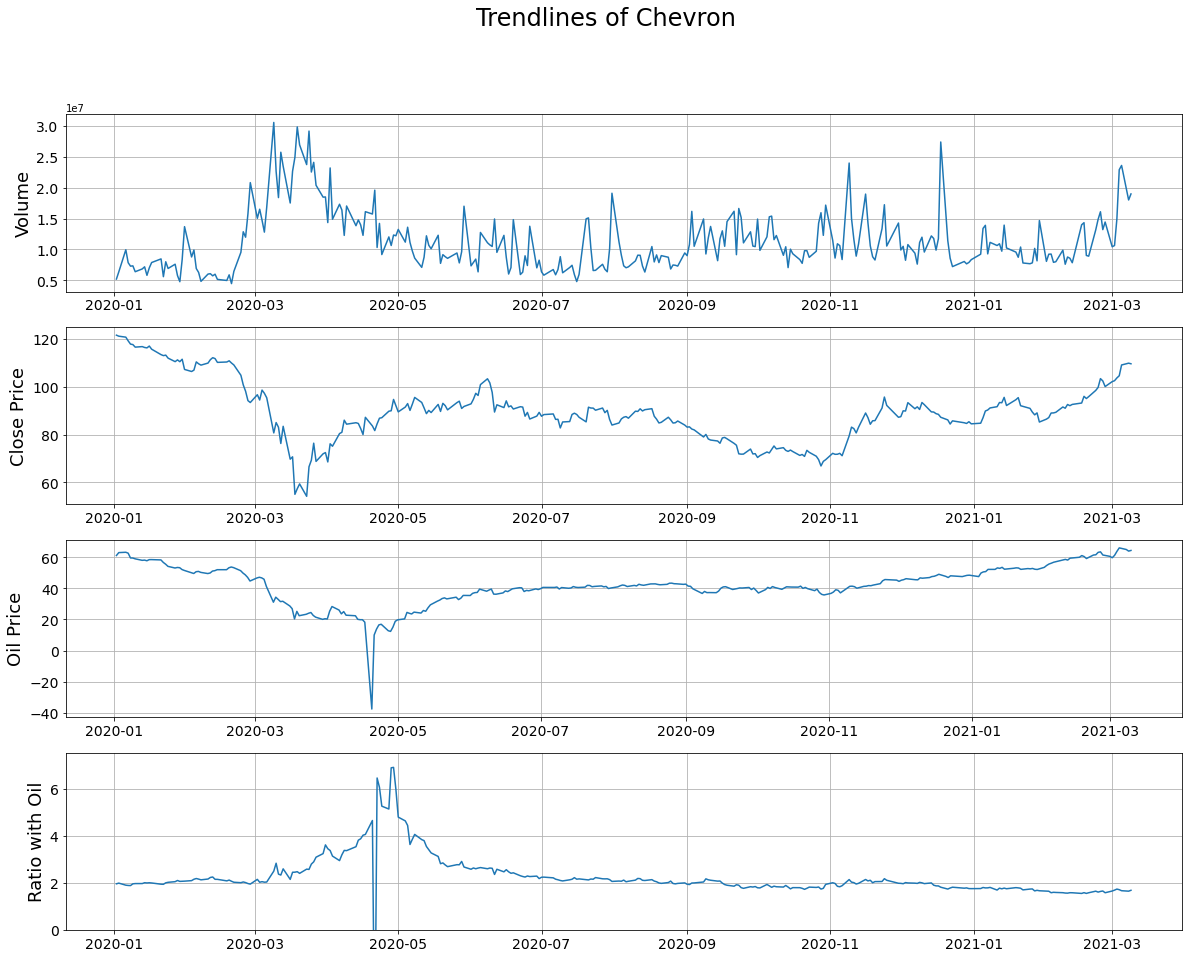

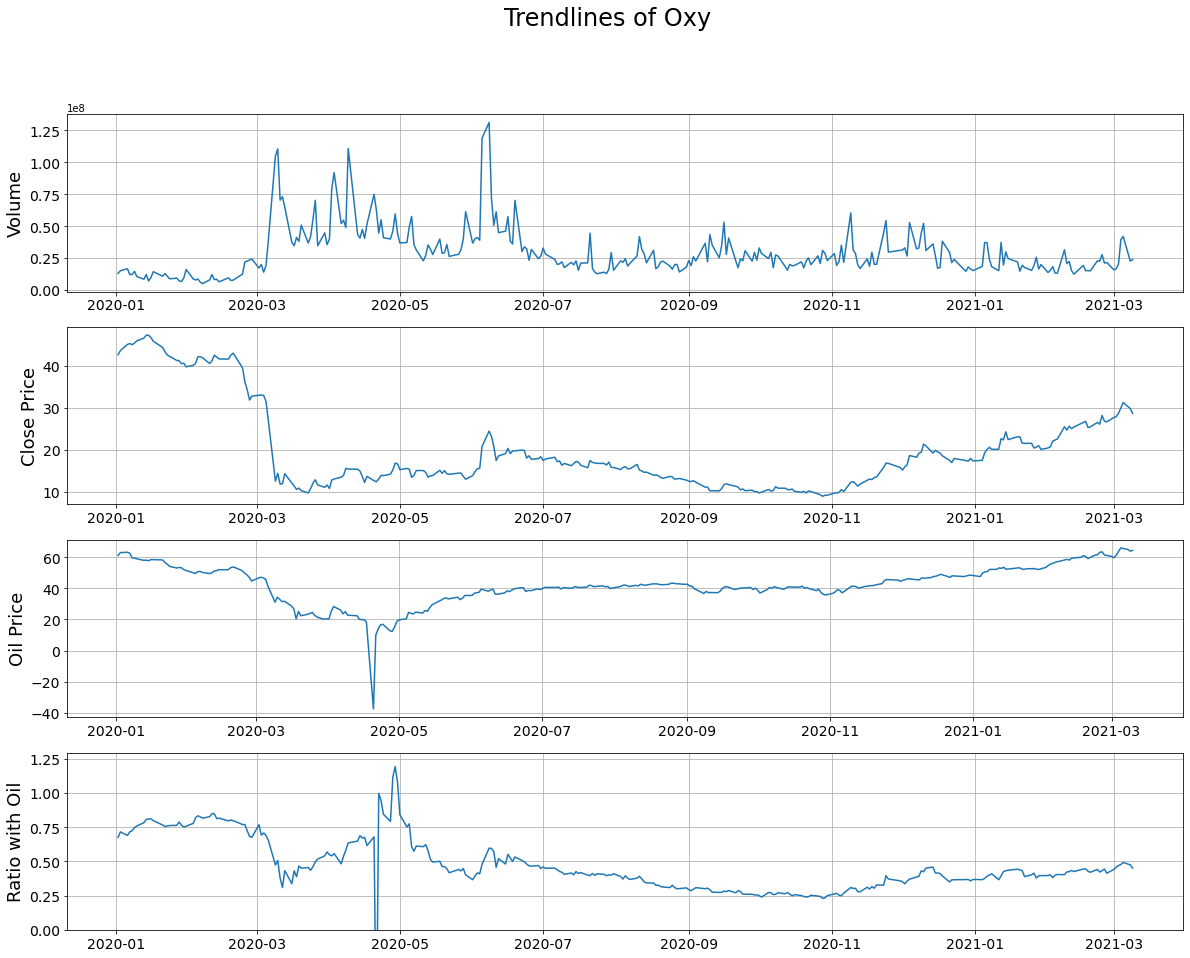

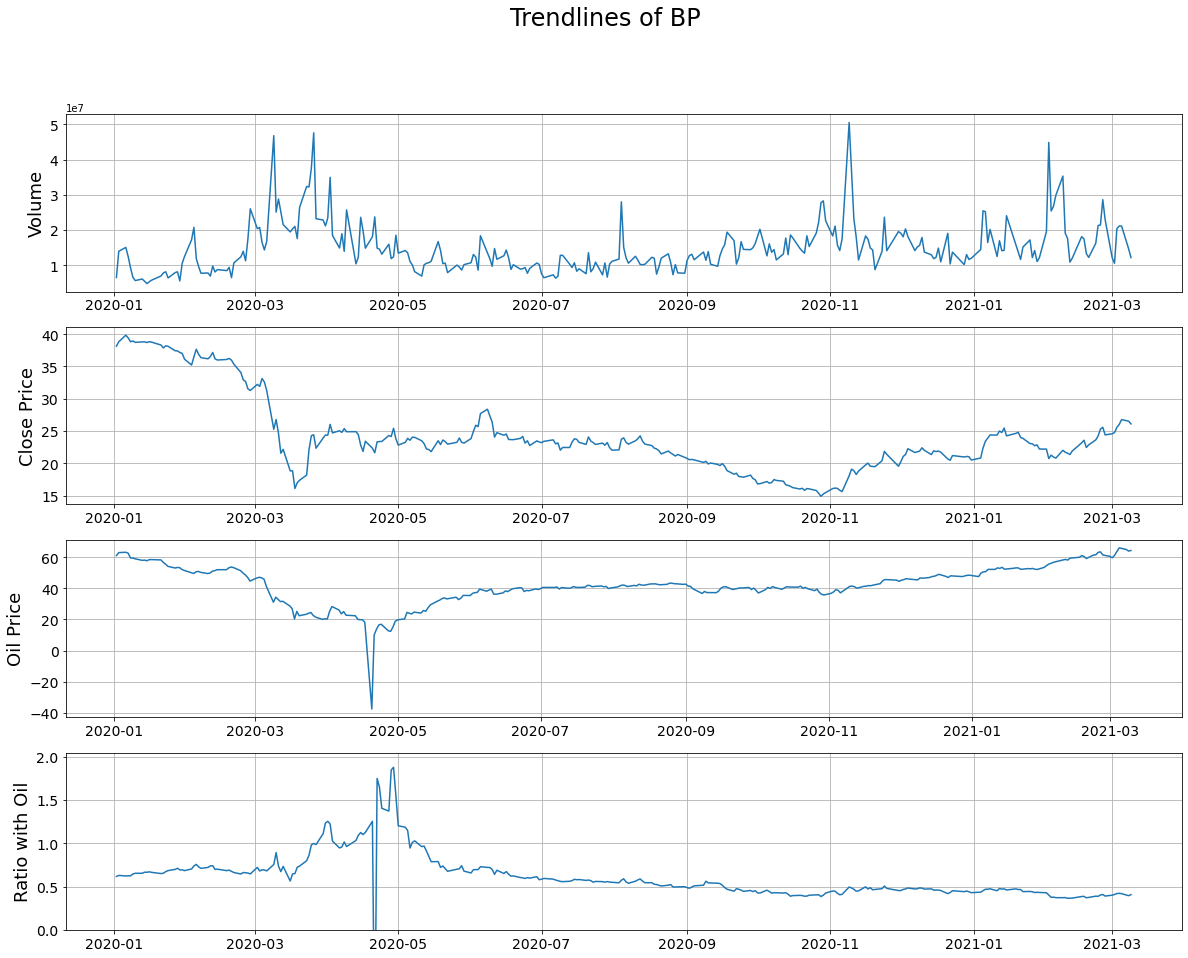

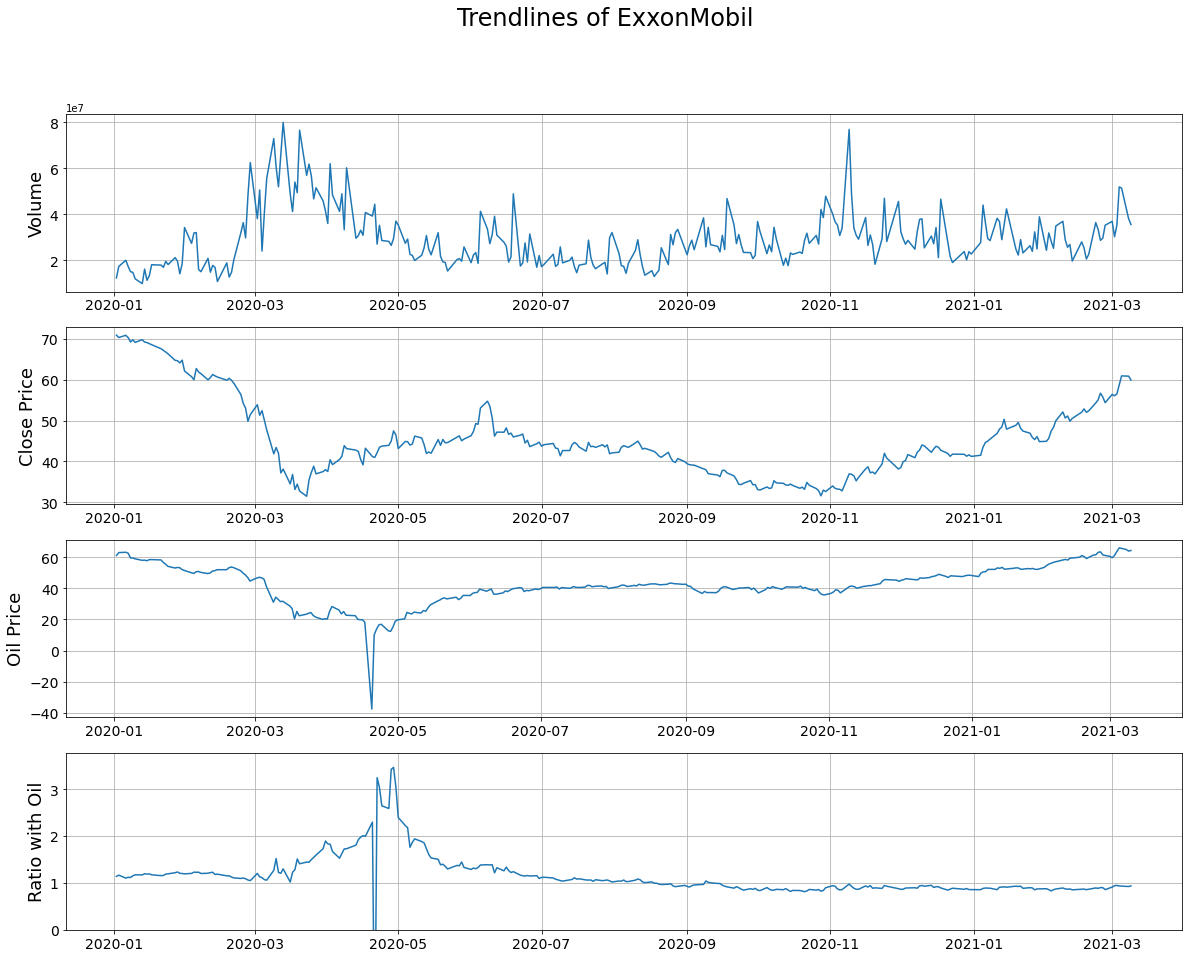

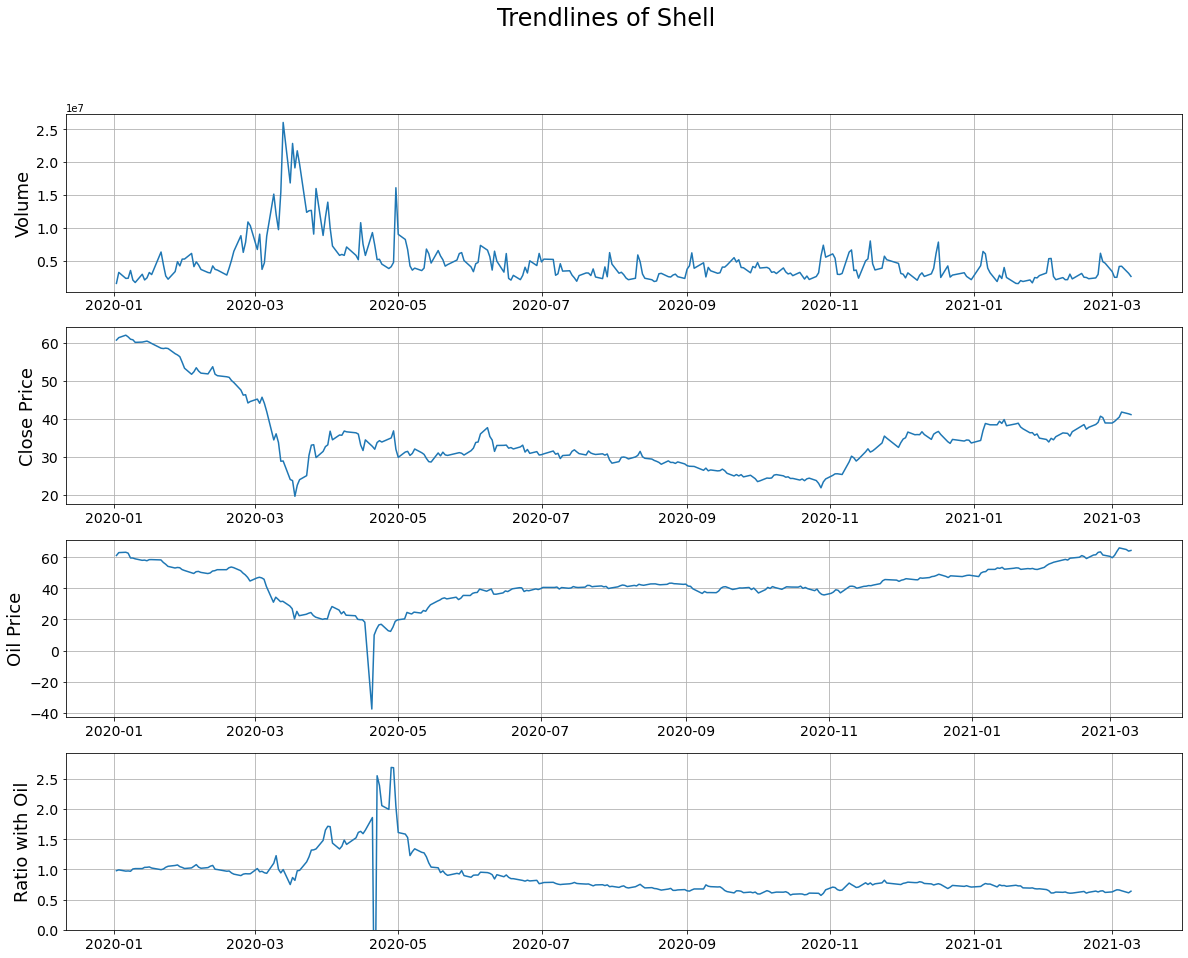

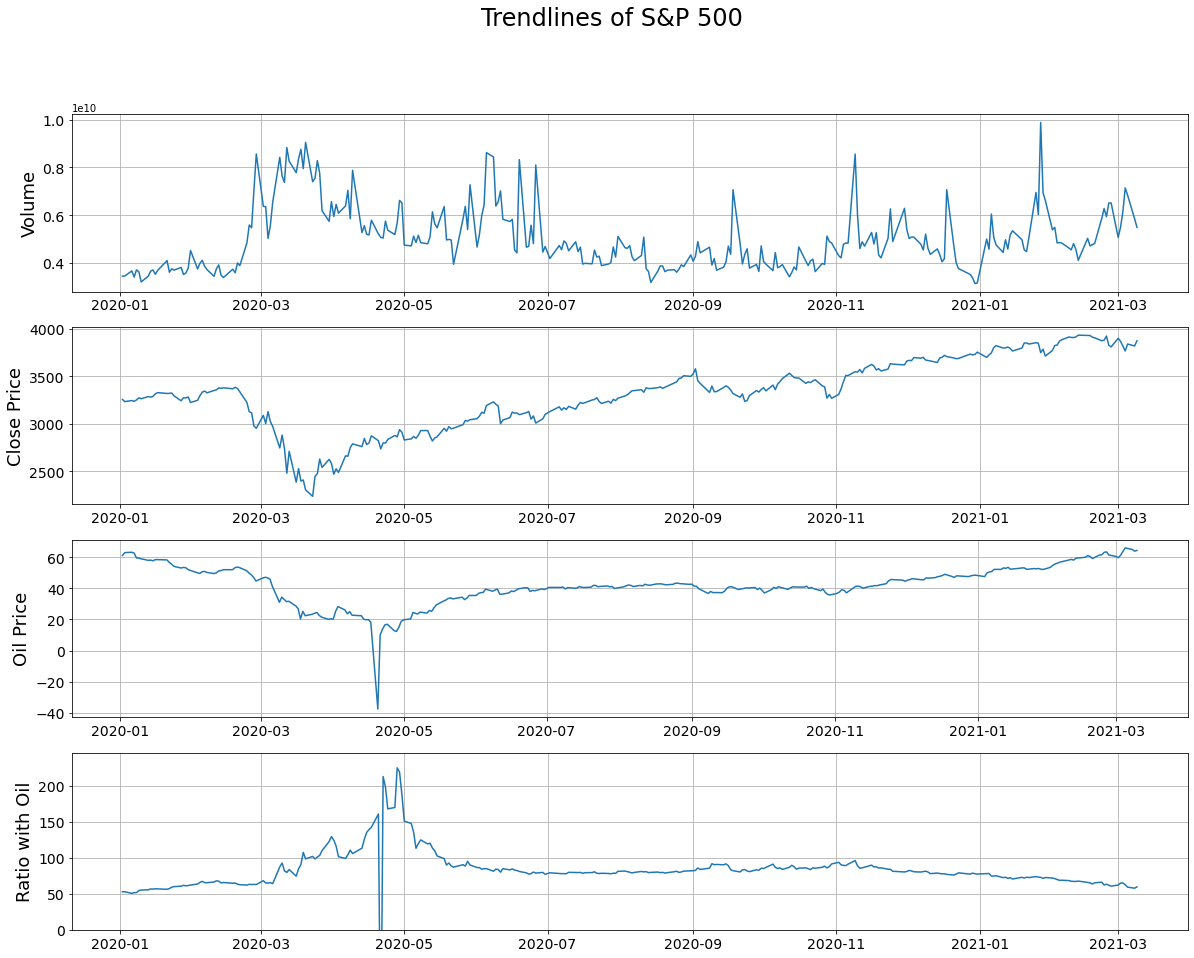

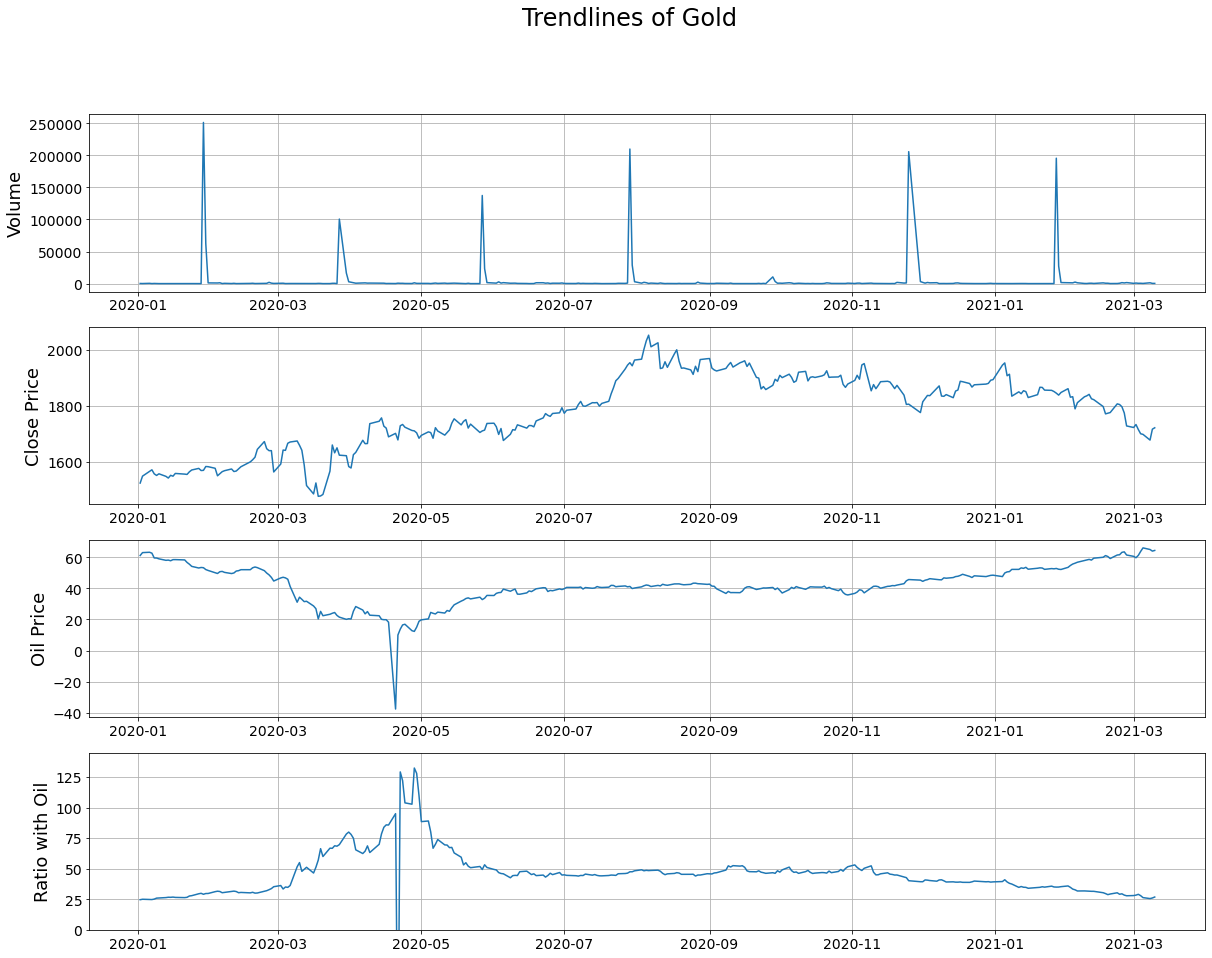

In [19]:
stocks = ['CVX', 'OXY', 'BP', 'XOM', 'RDS-B', '^GSPC', 'GC=F']
names = ['Chevron', 'Oxy', 'BP', 'ExxonMobil', 'Shell', 'S&P 500', 'Gold']
for (x,y) in zip(stocks,names):
    graphs(x,y,f'outputs/{y}_20-current.png')